## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTrain.csv")
df_test = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest.csv")
df_test21 = pd.read_csv("C:\\Users\\AJIT\\Desktop\\Data science\\Deep Learning\\Code\\NSL-KDD\\KDDTest-21.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df['Type']='Train'
df_test['Type']='Test'
df_test21['Type']='Test21'
data= pd.concat([df,df_test,df_test21],axis=0) 

In [5]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Train
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Train
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Train
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Train
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Train


In [6]:
target_col = ["class"]
cat_cols = ["protocol_type","service","flag"]
other_col=['Type','num_outbound_cmds'] #Test and Train Data set identifier
num_cols= list(set(list(df.columns))-set(cat_cols)-set(target_col)-set(other_col))

### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["protocol_type"] = labelencoder.fit_transform(data["protocol_type"])
data["service"] = labelencoder.fit_transform(data["service"])
data["flag"] = labelencoder.fit_transform(data["flag"])
data["class"] = labelencoder.fit_transform(data["class"])

# One-Hot-Encoding

In [8]:
data=pd.concat([data,pd.get_dummies(data["protocol_type"],prefix="protocol_type")],axis=1).drop(["protocol_type"],axis=1)
data=pd.concat([data,pd.get_dummies(data["service"],prefix="service")],axis=1).drop(["service"],axis=1)
data=pd.concat([data,pd.get_dummies(data["flag"],prefix="flag")],axis=1).drop(["flag"],axis=1)

In [9]:
train=data[data['Type']=='Train']
test=data[data['Type']=='Test']
test21=data[data['Type']=='Test21']

In [10]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1]:
print(train.head())

NameError: name 'train' is not defined

### Features & Target 

In [11]:
my_cols = set(train.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_train = train[my_cols]
y_train=train["class"]

In [12]:
my_cols = set(test.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test = test[my_cols]
y_test=test["class"]

In [13]:
my_cols = set(test21.columns)
my_cols.remove('class')
my_cols.remove('Type')
my_cols = list(my_cols)
X_test21 = test21[my_cols]
y_test21=test21["class"]

In [14]:
X_train.shape

(125973, 122)

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test21 = scaler.transform(X_test21)

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\AJIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [239]:
from sklearn.decomposition import PCA
pca = PCA(.80)  
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_test21 = pca.transform(X_test21)

In [22]:
X_train.shape

(125973, 122)

### RFECV

In [380]:
#https://chrisalbon.com/machine_learning/feature_selection/recursive_feature_elimination/
#https://www.scikit-yb.org/en/latest/api/features/rfecv.html
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [381]:
model = LogisticRegression()
rfecv = RFECV(estimator=model,scoring="accuracy")

In [382]:
rfecv.fit(X_train, y_train)

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to conv

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warni

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [385]:
X_train=rfecv.transform(X_train)
X_test=rfecv.transform(X_test)
X_test21=rfecv.transform(X_test21)

In [386]:
X_train.shape

(125973, 56)

In [ ]:
array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True])

In [23]:
cols = [2,9,16,26,69,72,81,84,93,94,101]
X_train.drop(X_train.columns[cols],axis=1,inplace=True)
X_test.drop(X_test.columns[cols],axis=1,inplace=True)
X_test21.drop(X_test21.columns[cols],axis=1,inplace=True)

C:\Users\AJIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values
X_test21=X_test21.values
y_test21=y_test21.values

In [25]:
X_train.shape

(125973, 111)

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
print('Train Result:{}'.format(lg.score(X_train, y_train)))
print('Test Result:{}'.format(lg.score(X_test, y_test)))
print('Test21 Result:{}'.format(lg.score(X_test21, y_test21)))

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Result:0.8859120605209053
Test Result:0.680846344925479
Test21 Result:0.3994092827004219


In [383]:
#from sklearn.model_selection import GridSearchCV
#lg1=LogisticRegression()
#param_grid = {"C":[0.001,0.01,1,10], "penalty":["l1","l2"]}
#lg_gscv = GridSearchCV(lg1, param_grid, cv=7)
#lg_gscv.fit(X_train, y_train)
#print('Train Result:{}'.format(lg_gscv.score(X_train, y_train)))
#print('Test Result:{}'.format(lg_gscv.score(X_test, y_test)))
#print('Test21 Result:{}'.format(lg_gscv.score(X_test21, y_test21)))

### KNN

In [384]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train,y_train)
#print('Train Result:{}'.format(knn.score(X_train, y_train)))
#print('Test Result:{}'.format(knn.score(X_test, y_test)))
#print('Test21 Result:{}'.format(knn.score(X_test21, y_test21)))

In [ ]:
from sklearn.model_selection import GridSearchCV
knn1 = KNeighborsClassifier()
param_grid = {'n_neighbors': [5,8,12,15,20,25]}
knn_gscv = GridSearchCV(knn1, param_grid, cv=7)
knn_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(knn_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(knn_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(knn_gscv.score(X_test21, y_test21)))

### Decision Tree

In [241]:
from sklearn import tree
tree= tree.DecisionTreeClassifier()
clf = tree.fit(X_train,y_train)
clf.fit(X_train,y_train)
print('Train Result:{}'.format(clf.score(X_train, y_train)))
print('Test Result:{}'.format(clf.score(X_test, y_test)))
print('Test21 Result:{}'.format(clf.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.8140081618168914
Test21 Result:0.6465822784810127


In [14]:
#from sklearn import tree
#from sklearn.model_selection import GridSearchCV
#tree=tree.DecisionTreeClassifier(random_state=1)
#param_grid = {}
#tree_gscv = GridSearchCV(tree, param_grid, cv=7)
#tree_gscv.fit(X_train, y_train)
#print('Train Result:{}'.format(tree_gscv.score(X_train, y_train)))
#print('Test Result:{}'.format(tree_gscv.score(X_test, y_test)))
#print('Test21 Result:{}'.format(tree_gscv.score(X_test21, y_test21)))

In [15]:
#tree_gscv.get_params

### BaggingClassifier

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bme= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
bme.fit(X_train,y_train)
print('Train Result:{}'.format(bme.score(X_train, y_train)))
print('Test Result:{}'.format(bme.score(X_test, y_test)))
print('Test21 Result:{}'.format(bme.score(X_test21, y_test21)))

Train Result:0.9995951513419542
Test Result:0.7967530163236338
Test21 Result:0.6137552742616034


In [326]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
bme1= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
param_grid = {}
bme_gscv = GridSearchCV(bme1, param_grid, cv=3)
bme_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(bme_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(bme_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(bme_gscv.score(X_test21, y_test21)))

Train Result:0.9998809268652806
Test Result:0.8139638041163946
Test21 Result:0.649873417721519


### Random Forest

In [112]:
import random
random.seed(500)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Train Result:{}'.format(rf.score(X_train, y_train)))
print('Test Result:{}'.format(rf.score(X_test, y_test)))
print('Test Result:{}'.format(rf.score(X_test21, y_test21)))

C:\Users\AJIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Result:0.9996348423868606
Test Result:0.7844215755855216
Test Result:0.589957805907173


In [106]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf1= RandomForestClassifier()
param_grid = {'n_estimators':[500]}
rf_gscv = GridSearchCV(rf1, param_grid, cv=3)
rf_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(rf_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(rf_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(rf_gscv.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.7758605393896381
Test Result:0.5735864978902954


## AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print('Train Result:{}'.format(ada.score(X_train, y_train)))
print('Test Result:{}'.format(ada.score(X_test, y_test)))
print('Test Result:{}'.format(ada.score(X_test21, y_test21)))

Train Result:0.9912203408666936
Test Result:0.7848651525904897
Test Result:0.5918987341772152


In [180]:
ada.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)>

In [36]:
from sklearn.model_selection import GridSearchCV
ada1 = AdaBoostClassifier()
param_grid = {"n_estimators":[500]}
ada_gscv = GridSearchCV(ada1, param_grid, cv=3)
ada_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(ada_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(ada_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(ada_gscv.score(X_test21, y_test21)))

Train Result:0.9923951957959245
Test Result:0.7746185237757275


### GBM

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
print('Train Result:{}'.format(gbm.score(X_train, y_train)))
print('Test Result:{}'.format(gbm.score(X_test, y_test)))
print('Test Result:{}'.format(gbm.score(X_test21, y_test21)))

Train Result:0.9957213053590849
Test Result:0.8071327182398864
Test Result:0.6330801687763713


In [16]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)>

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbm1 = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.02],'n_estimators':[1000,1500]}
gbm_gscv = GridSearchCV(gbm1, param_grid, cv=5)
gbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(gbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(gbm_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(gbm_gscv.score(X_test21, y_test21)))

Train Result:0.9986425662641994
Test Result:0.8101490418736693
Test21 Result:0.6388185654008439


In [23]:
gbm_gscv.best_params_

{'learning_rate': 0.02, 'n_estimators': 1500}

In [26]:
a=gbm.feature_importances_
a=a[a != 0]
a

array([7.19686432e-04, 3.98631717e-04, 2.51555392e-03, 6.22917285e-04,
       1.80760543e-04, 1.48164431e-04, 3.28083968e-07, 1.13265122e-04,
       1.87338650e-04, 1.78328929e-02, 2.55748560e-05, 3.75448312e-04,
       1.13520469e-02, 2.77260217e-06, 2.64836166e-05, 4.60692717e-05,
       2.28555871e-04, 3.70141753e-05, 7.84767538e-05, 1.35865324e-03,
       3.73068282e-06, 1.64548137e-07, 5.51459761e-08, 3.91490325e-04,
       4.15058356e-03, 2.67489466e-03, 1.14986582e-05, 1.33135223e-02,
       3.19732139e-03, 6.32782155e-04, 7.55359004e-06, 2.49301596e-05,
       1.83345989e-04, 3.83774216e-04, 4.09356563e-05, 1.05311667e-04,
       3.52271363e-05, 8.39337305e-08, 1.12173174e-05, 2.73644934e-05,
       8.57574458e-05, 9.81058514e-06, 4.50458285e-06, 3.72823702e-07,
       2.93910234e-03, 3.67212302e-04, 2.06993445e-04, 3.28454532e-03,
       6.88022857e-02, 2.07212080e-05, 1.96261864e-03, 2.13011047e-05,
       1.32547255e-03, 7.64441053e-05, 2.10771556e-03, 1.43953864e-04,
      

In [31]:
b=sorted(gbm.feature_importances_, reverse=True)
b=b[0:10]

In [24]:
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
predictors=list(X_train)
feat_imp = pd.Series(gbm_gscv.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm_gscv.score(X_test, y_test)))
pred=gbm_gscv.predict(X_test)
print(classification_report(y_test, pred))

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [18]:
type(a)

numpy.ndarray

In [19]:
sorted(range(len(a)), key=lambda i: a[i])[-2:]

[61, 59]

In [38]:
from sklearn.model_selection import GridSearchCV
gbm1 = GradientBoostingClassifier()
param_grid = {'n_estimators':[1000]}
gbm_gscv = GridSearchCV(gbm1, param_grid, cv=3)
gbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(gbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(gbm_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(gbm_gscv.score(X_test21, y_test21)))

Train Result:0.9998571122383367
Test Result:0.8248757984386089
Test Result:0.6670886075949367


Accuracy of the GBM on test set: 0.825
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     12833
           1       0.72      0.97      0.83      9711

   micro avg       0.83      0.83      0.83     22544
   macro avg       0.85      0.84      0.82     22544
weighted avg       0.86      0.83      0.82     22544



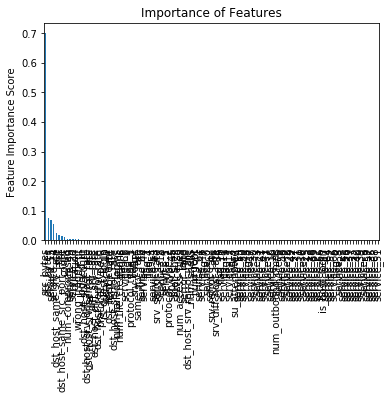

In [39]:
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
predictors=list(X_train)
feat_imp = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_test, y_test)))
pred=gbm.predict(X_test)
print(classification_report(y_test, pred))

### XG Boost

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
print('Train Result:{}'.format(xgb.score(X_train, y_train)))
print('Test Result:{}'.format(xgb.score(X_test, y_test)))
print('Test Result:{}'.format(xgb.score(X_test21, y_test21)))

Train Result:0.9998571122383367
Test Result:0.7887686302342086
Test Result:0.5981434599156118


In [33]:
from sklearn.model_selection import GridSearchCV
xgb1=XGBClassifier()
param_grid = {"n_estimators":[1000]}
xgb_gscv = GridSearchCV(xgb1, param_grid, cv=3)
xgb_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(xgb_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(xgb_gscv.score(X_test, y_test)))

Train Result:0.9976185373056131
Test Result:0.7852200141944642


### Light GBM

In [50]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
print('Train Result:{}'.format(lgbm.score(X_train, y_train)))
print('Test Result:{}'.format(lgbm.score(X_test, y_test)))
print('Test21 Result:{}'.format(lgbm.score(X_test21, y_test21)))

Train Result:0.999944432537131
Test Result:0.7858853797019163
Test Result:0.5927426160337552


In [52]:
from sklearn.model_selection import GridSearchCV
lgbm1=LGBMClassifier()
param_grid = {"n_estimators":[100]}
lgbm_gscv = GridSearchCV(lgbm1, param_grid, cv=5)
lgbm_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(lgbm_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(lgbm_gscv.score(X_test, y_test)))
print('Test21 Result:{}'.format(lgbm_gscv.score(X_test21, y_test21)))

Train Result:0.9997697919395426
Test Result:0.7913413768630234
Test21 Result:0.6032067510548523


### Cat Boost

In [42]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(n_estimators=2000)
cat.fit(X_train,y_train)
print('Train Result:{}'.format(cat.score(X_train, y_train)))
print('Test Result:{}'.format(cat.score(X_test, y_test)))
print('Test Result:{}'.format(cat.score(X_test21, y_test21)))

Learning rate set to 0.015694
0:	learn: 0.6499001	total: 138ms	remaining: 11m 30s
1:	learn: 0.6164763	total: 269ms	remaining: 11m 11s
2:	learn: 0.5784086	total: 423ms	remaining: 11m 44s
3:	learn: 0.5410812	total: 568ms	remaining: 11m 49s
4:	learn: 0.5142808	total: 748ms	remaining: 12m 26s
5:	learn: 0.4769392	total: 878ms	remaining: 12m 10s
6:	learn: 0.4514090	total: 1.03s	remaining: 12m 15s
7:	learn: 0.4262526	total: 1.18s	remaining: 12m 14s
8:	learn: 0.3994338	total: 1.34s	remaining: 12m 21s
9:	learn: 0.3716990	total: 1.47s	remaining: 12m 14s
10:	learn: 0.3525347	total: 1.64s	remaining: 12m 25s
11:	learn: 0.3383662	total: 1.77s	remaining: 12m 17s
12:	learn: 0.3200395	total: 1.91s	remaining: 12m 13s
13:	learn: 0.3040068	total: 2.06s	remaining: 12m 15s
14:	learn: 0.2873660	total: 2.23s	remaining: 12m 20s
15:	learn: 0.2722209	total: 2.37s	remaining: 12m 18s
16:	learn: 0.2601085	total: 2.54s	remaining: 12m 25s
17:	learn: 0.2461161	total: 2.67s	remaining: 12m 20s
18:	learn: 0.2349823	total

155:	learn: 0.0236656	total: 25.8s	remaining: 13m 19s
156:	learn: 0.0235834	total: 25.9s	remaining: 13m 19s
157:	learn: 0.0234698	total: 26.1s	remaining: 13m 19s
158:	learn: 0.0232290	total: 26.3s	remaining: 13m 20s
159:	learn: 0.0230543	total: 26.5s	remaining: 13m 21s
160:	learn: 0.0228752	total: 26.7s	remaining: 13m 21s
161:	learn: 0.0227961	total: 26.9s	remaining: 13m 22s
162:	learn: 0.0227046	total: 27s	remaining: 13m 22s
163:	learn: 0.0226096	total: 27.2s	remaining: 13m 21s
164:	learn: 0.0225306	total: 27.5s	remaining: 13m 24s
165:	learn: 0.0224935	total: 27.6s	remaining: 13m 25s
166:	learn: 0.0224758	total: 27.8s	remaining: 13m 24s
167:	learn: 0.0223917	total: 28s	remaining: 13m 24s
168:	learn: 0.0223444	total: 28.1s	remaining: 13m 23s
169:	learn: 0.0222945	total: 28.2s	remaining: 13m 22s
170:	learn: 0.0222100	total: 28.4s	remaining: 13m 21s
171:	learn: 0.0221675	total: 28.5s	remaining: 13m 20s
172:	learn: 0.0221468	total: 28.7s	remaining: 13m 20s
173:	learn: 0.0220917	total: 28.

309:	learn: 0.0151436	total: 47.4s	remaining: 11m 56s
310:	learn: 0.0150765	total: 47.5s	remaining: 11m 55s
311:	learn: 0.0150448	total: 47.6s	remaining: 11m 54s
312:	learn: 0.0149918	total: 47.7s	remaining: 11m 54s
313:	learn: 0.0149606	total: 47.8s	remaining: 11m 53s
314:	learn: 0.0149467	total: 47.9s	remaining: 11m 52s
315:	learn: 0.0148868	total: 48.1s	remaining: 11m 52s
316:	learn: 0.0148692	total: 48.1s	remaining: 11m 51s
317:	learn: 0.0148055	total: 48.3s	remaining: 11m 50s
318:	learn: 0.0147800	total: 48.4s	remaining: 11m 49s
319:	learn: 0.0147325	total: 48.5s	remaining: 11m 48s
320:	learn: 0.0147034	total: 48.6s	remaining: 11m 48s
321:	learn: 0.0146842	total: 48.7s	remaining: 11m 47s
322:	learn: 0.0146611	total: 48.8s	remaining: 11m 46s
323:	learn: 0.0146320	total: 48.9s	remaining: 11m 45s
324:	learn: 0.0146123	total: 49s	remaining: 11m 44s
325:	learn: 0.0145833	total: 49.1s	remaining: 11m 43s
326:	learn: 0.0145632	total: 49.2s	remaining: 11m 43s
327:	learn: 0.0145186	total: 4

464:	learn: 0.0109183	total: 1m 4s	remaining: 10m 26s
465:	learn: 0.0108531	total: 1m 4s	remaining: 10m 26s
466:	learn: 0.0107948	total: 1m 4s	remaining: 10m 26s
467:	learn: 0.0107823	total: 1m 4s	remaining: 10m 25s
468:	learn: 0.0107634	total: 1m 4s	remaining: 10m 25s
469:	learn: 0.0107507	total: 1m 4s	remaining: 10m 24s
470:	learn: 0.0107415	total: 1m 4s	remaining: 10m 24s
471:	learn: 0.0107134	total: 1m 5s	remaining: 10m 24s
472:	learn: 0.0106987	total: 1m 5s	remaining: 10m 23s
473:	learn: 0.0106858	total: 1m 5s	remaining: 10m 23s
474:	learn: 0.0106686	total: 1m 5s	remaining: 10m 22s
475:	learn: 0.0106462	total: 1m 5s	remaining: 10m 22s
476:	learn: 0.0106325	total: 1m 5s	remaining: 10m 22s
477:	learn: 0.0106135	total: 1m 5s	remaining: 10m 21s
478:	learn: 0.0106077	total: 1m 5s	remaining: 10m 21s
479:	learn: 0.0105935	total: 1m 5s	remaining: 10m 20s
480:	learn: 0.0105801	total: 1m 6s	remaining: 10m 20s
481:	learn: 0.0105546	total: 1m 6s	remaining: 10m 20s
482:	learn: 0.0105411	total:

618:	learn: 0.0085851	total: 1m 21s	remaining: 9m 35s
619:	learn: 0.0085626	total: 1m 21s	remaining: 9m 35s
620:	learn: 0.0085492	total: 1m 21s	remaining: 9m 35s
621:	learn: 0.0085269	total: 1m 21s	remaining: 9m 35s
622:	learn: 0.0085180	total: 1m 21s	remaining: 9m 35s
623:	learn: 0.0085105	total: 1m 21s	remaining: 9m 34s
624:	learn: 0.0084959	total: 1m 22s	remaining: 9m 34s
625:	learn: 0.0084793	total: 1m 22s	remaining: 9m 34s
626:	learn: 0.0084706	total: 1m 22s	remaining: 9m 33s
627:	learn: 0.0084657	total: 1m 22s	remaining: 9m 33s
628:	learn: 0.0084631	total: 1m 22s	remaining: 9m 33s
629:	learn: 0.0084578	total: 1m 22s	remaining: 9m 32s
630:	learn: 0.0084479	total: 1m 22s	remaining: 9m 32s
631:	learn: 0.0084391	total: 1m 22s	remaining: 9m 32s
632:	learn: 0.0084336	total: 1m 22s	remaining: 9m 31s
633:	learn: 0.0084302	total: 1m 22s	remaining: 9m 31s
634:	learn: 0.0084260	total: 1m 23s	remaining: 9m 31s
635:	learn: 0.0084128	total: 1m 23s	remaining: 9m 31s
636:	learn: 0.0084000	total:

771:	learn: 0.0070443	total: 1m 38s	remaining: 8m 58s
772:	learn: 0.0070430	total: 1m 38s	remaining: 8m 58s
773:	learn: 0.0070358	total: 1m 38s	remaining: 8m 58s
774:	learn: 0.0070229	total: 1m 38s	remaining: 8m 58s
775:	learn: 0.0070174	total: 1m 38s	remaining: 8m 57s
776:	learn: 0.0070136	total: 1m 38s	remaining: 8m 57s
777:	learn: 0.0070085	total: 1m 39s	remaining: 8m 57s
778:	learn: 0.0070030	total: 1m 39s	remaining: 8m 57s
779:	learn: 0.0069979	total: 1m 39s	remaining: 8m 57s
780:	learn: 0.0069961	total: 1m 39s	remaining: 8m 56s
781:	learn: 0.0069927	total: 1m 39s	remaining: 8m 56s
782:	learn: 0.0069871	total: 1m 39s	remaining: 8m 56s
783:	learn: 0.0069859	total: 1m 39s	remaining: 8m 56s
784:	learn: 0.0069843	total: 1m 39s	remaining: 8m 56s
785:	learn: 0.0069702	total: 1m 40s	remaining: 8m 56s
786:	learn: 0.0069671	total: 1m 40s	remaining: 8m 56s
787:	learn: 0.0069603	total: 1m 40s	remaining: 8m 56s
788:	learn: 0.0069490	total: 1m 40s	remaining: 8m 56s
789:	learn: 0.0069413	total:

923:	learn: 0.0060079	total: 1m 55s	remaining: 8m 29s
924:	learn: 0.0060007	total: 1m 55s	remaining: 8m 29s
925:	learn: 0.0059960	total: 1m 55s	remaining: 8m 29s
926:	learn: 0.0059829	total: 1m 55s	remaining: 8m 29s
927:	learn: 0.0059754	total: 1m 55s	remaining: 8m 28s
928:	learn: 0.0059702	total: 1m 56s	remaining: 8m 28s
929:	learn: 0.0059635	total: 1m 56s	remaining: 8m 28s
930:	learn: 0.0059615	total: 1m 56s	remaining: 8m 28s
931:	learn: 0.0059563	total: 1m 56s	remaining: 8m 28s
932:	learn: 0.0059512	total: 1m 56s	remaining: 8m 27s
933:	learn: 0.0059422	total: 1m 56s	remaining: 8m 27s
934:	learn: 0.0059387	total: 1m 56s	remaining: 8m 27s
935:	learn: 0.0059340	total: 1m 56s	remaining: 8m 27s
936:	learn: 0.0059277	total: 1m 56s	remaining: 8m 27s
937:	learn: 0.0059268	total: 1m 57s	remaining: 8m 27s
938:	learn: 0.0059230	total: 1m 57s	remaining: 8m 26s
939:	learn: 0.0059190	total: 1m 57s	remaining: 8m 26s
940:	learn: 0.0059037	total: 1m 57s	remaining: 8m 26s
941:	learn: 0.0058991	total:

1077:	learn: 0.0051867	total: 2m 13s	remaining: 8m 6s
1078:	learn: 0.0051826	total: 2m 13s	remaining: 8m 6s
1079:	learn: 0.0051798	total: 2m 14s	remaining: 8m 6s
1080:	learn: 0.0051722	total: 2m 14s	remaining: 8m 6s
1081:	learn: 0.0051573	total: 2m 14s	remaining: 8m 6s
1082:	learn: 0.0051552	total: 2m 14s	remaining: 8m 6s
1083:	learn: 0.0051538	total: 2m 14s	remaining: 8m 6s
1084:	learn: 0.0051522	total: 2m 14s	remaining: 8m 6s
1085:	learn: 0.0051461	total: 2m 15s	remaining: 8m 6s
1086:	learn: 0.0051426	total: 2m 15s	remaining: 8m 6s
1087:	learn: 0.0051420	total: 2m 15s	remaining: 8m 6s
1088:	learn: 0.0051292	total: 2m 15s	remaining: 8m 6s
1089:	learn: 0.0051259	total: 2m 15s	remaining: 8m 6s
1090:	learn: 0.0051246	total: 2m 15s	remaining: 8m 6s
1091:	learn: 0.0051156	total: 2m 16s	remaining: 8m 6s
1092:	learn: 0.0051134	total: 2m 16s	remaining: 8m 6s
1093:	learn: 0.0051093	total: 2m 16s	remaining: 8m 6s
1094:	learn: 0.0051062	total: 2m 16s	remaining: 8m 6s
1095:	learn: 0.0050994	total

1229:	learn: 0.0045973	total: 2m 34s	remaining: 7m 53s
1230:	learn: 0.0045959	total: 2m 34s	remaining: 7m 53s
1231:	learn: 0.0045919	total: 2m 34s	remaining: 7m 53s
1232:	learn: 0.0045910	total: 2m 35s	remaining: 7m 54s
1233:	learn: 0.0045896	total: 2m 35s	remaining: 7m 54s
1234:	learn: 0.0045858	total: 2m 35s	remaining: 7m 53s
1235:	learn: 0.0045852	total: 2m 35s	remaining: 7m 53s
1236:	learn: 0.0045845	total: 2m 35s	remaining: 7m 54s
1237:	learn: 0.0045828	total: 2m 35s	remaining: 7m 54s
1238:	learn: 0.0045781	total: 2m 36s	remaining: 7m 54s
1239:	learn: 0.0045759	total: 2m 36s	remaining: 7m 54s
1240:	learn: 0.0045694	total: 2m 36s	remaining: 7m 54s
1241:	learn: 0.0045658	total: 2m 36s	remaining: 7m 54s
1242:	learn: 0.0045636	total: 2m 36s	remaining: 7m 54s
1243:	learn: 0.0045631	total: 2m 37s	remaining: 7m 54s
1244:	learn: 0.0045596	total: 2m 37s	remaining: 7m 54s
1245:	learn: 0.0045581	total: 2m 37s	remaining: 7m 54s
1246:	learn: 0.0045531	total: 2m 37s	remaining: 7m 54s
1247:	lear

1378:	learn: 0.0041387	total: 2m 55s	remaining: 7m 41s
1379:	learn: 0.0041364	total: 2m 55s	remaining: 7m 41s
1380:	learn: 0.0041338	total: 2m 55s	remaining: 7m 41s
1381:	learn: 0.0041172	total: 2m 56s	remaining: 7m 41s
1382:	learn: 0.0041167	total: 2m 56s	remaining: 7m 40s
1383:	learn: 0.0041136	total: 2m 56s	remaining: 7m 40s
1384:	learn: 0.0041083	total: 2m 56s	remaining: 7m 40s
1385:	learn: 0.0041068	total: 2m 56s	remaining: 7m 40s
1386:	learn: 0.0041039	total: 2m 56s	remaining: 7m 40s
1387:	learn: 0.0041000	total: 2m 56s	remaining: 7m 40s
1388:	learn: 0.0040985	total: 2m 56s	remaining: 7m 40s
1389:	learn: 0.0040967	total: 2m 57s	remaining: 7m 39s
1390:	learn: 0.0040958	total: 2m 57s	remaining: 7m 39s
1391:	learn: 0.0040931	total: 2m 57s	remaining: 7m 39s
1392:	learn: 0.0040895	total: 2m 57s	remaining: 7m 39s
1393:	learn: 0.0040862	total: 2m 57s	remaining: 7m 39s
1394:	learn: 0.0040834	total: 2m 57s	remaining: 7m 39s
1395:	learn: 0.0040732	total: 2m 57s	remaining: 7m 38s
1396:	lear

1530:	learn: 0.0036871	total: 3m 15s	remaining: 7m 23s
1531:	learn: 0.0036856	total: 3m 15s	remaining: 7m 23s
1532:	learn: 0.0036847	total: 3m 16s	remaining: 7m 23s
1533:	learn: 0.0036787	total: 3m 16s	remaining: 7m 23s
1534:	learn: 0.0036770	total: 3m 16s	remaining: 7m 23s
1535:	learn: 0.0036767	total: 3m 16s	remaining: 7m 22s
1536:	learn: 0.0036737	total: 3m 16s	remaining: 7m 22s
1537:	learn: 0.0036730	total: 3m 16s	remaining: 7m 22s
1538:	learn: 0.0036713	total: 3m 16s	remaining: 7m 22s
1539:	learn: 0.0036709	total: 3m 17s	remaining: 7m 22s
1540:	learn: 0.0036704	total: 3m 17s	remaining: 7m 22s
1541:	learn: 0.0036688	total: 3m 17s	remaining: 7m 22s
1542:	learn: 0.0036625	total: 3m 17s	remaining: 7m 22s
1543:	learn: 0.0036624	total: 3m 17s	remaining: 7m 22s
1544:	learn: 0.0036577	total: 3m 17s	remaining: 7m 22s
1545:	learn: 0.0036569	total: 3m 18s	remaining: 7m 22s
1546:	learn: 0.0036542	total: 3m 18s	remaining: 7m 22s
1547:	learn: 0.0036529	total: 3m 18s	remaining: 7m 22s
1548:	lear

1679:	learn: 0.0033531	total: 3m 42s	remaining: 7m 20s
1680:	learn: 0.0033522	total: 3m 43s	remaining: 7m 20s
1681:	learn: 0.0033511	total: 3m 43s	remaining: 7m 20s
1682:	learn: 0.0033502	total: 3m 43s	remaining: 7m 20s
1683:	learn: 0.0033383	total: 3m 43s	remaining: 7m 20s
1684:	learn: 0.0033343	total: 3m 43s	remaining: 7m 20s
1685:	learn: 0.0033307	total: 3m 44s	remaining: 7m 20s
1686:	learn: 0.0033294	total: 3m 44s	remaining: 7m 20s
1687:	learn: 0.0033290	total: 3m 44s	remaining: 7m 20s
1688:	learn: 0.0033283	total: 3m 44s	remaining: 7m 20s
1689:	learn: 0.0033228	total: 3m 44s	remaining: 7m 20s
1690:	learn: 0.0033210	total: 3m 45s	remaining: 7m 20s
1691:	learn: 0.0033192	total: 3m 45s	remaining: 7m 20s
1692:	learn: 0.0033159	total: 3m 45s	remaining: 7m 20s
1693:	learn: 0.0033140	total: 3m 45s	remaining: 7m 20s
1694:	learn: 0.0033100	total: 3m 45s	remaining: 7m 20s
1695:	learn: 0.0033095	total: 3m 46s	remaining: 7m 20s
1696:	learn: 0.0033048	total: 3m 46s	remaining: 7m 20s
1697:	lear

1829:	learn: 0.0030698	total: 4m 15s	remaining: 7m 22s
1830:	learn: 0.0030696	total: 4m 15s	remaining: 7m 22s
1831:	learn: 0.0030666	total: 4m 16s	remaining: 7m 22s
1832:	learn: 0.0030653	total: 4m 16s	remaining: 7m 22s
1833:	learn: 0.0030647	total: 4m 16s	remaining: 7m 22s
1834:	learn: 0.0030638	total: 4m 16s	remaining: 7m 22s
1835:	learn: 0.0030588	total: 4m 16s	remaining: 7m 22s
1836:	learn: 0.0030566	total: 4m 17s	remaining: 7m 22s
1837:	learn: 0.0030554	total: 4m 17s	remaining: 7m 22s
1838:	learn: 0.0030532	total: 4m 17s	remaining: 7m 22s
1839:	learn: 0.0030509	total: 4m 17s	remaining: 7m 22s
1840:	learn: 0.0030509	total: 4m 17s	remaining: 7m 22s
1841:	learn: 0.0030503	total: 4m 18s	remaining: 7m 22s
1842:	learn: 0.0030497	total: 4m 18s	remaining: 7m 22s
1843:	learn: 0.0030497	total: 4m 18s	remaining: 7m 22s
1844:	learn: 0.0030494	total: 4m 18s	remaining: 7m 22s
1845:	learn: 0.0030490	total: 4m 19s	remaining: 7m 22s
1846:	learn: 0.0030488	total: 4m 19s	remaining: 7m 22s
1847:	lear

1979:	learn: 0.0028596	total: 4m 40s	remaining: 7m 7s
1980:	learn: 0.0028593	total: 4m 40s	remaining: 7m 7s
1981:	learn: 0.0028578	total: 4m 40s	remaining: 7m 7s
1982:	learn: 0.0028575	total: 4m 40s	remaining: 7m 7s
1983:	learn: 0.0028560	total: 4m 41s	remaining: 7m 7s
1984:	learn: 0.0028528	total: 4m 41s	remaining: 7m 7s
1985:	learn: 0.0028517	total: 4m 41s	remaining: 7m 6s
1986:	learn: 0.0028510	total: 4m 41s	remaining: 7m 6s
1987:	learn: 0.0028500	total: 4m 41s	remaining: 7m 6s
1988:	learn: 0.0028486	total: 4m 41s	remaining: 7m 6s
1989:	learn: 0.0028464	total: 4m 41s	remaining: 7m 6s
1990:	learn: 0.0028461	total: 4m 41s	remaining: 7m 5s
1991:	learn: 0.0028456	total: 4m 41s	remaining: 7m 5s
1992:	learn: 0.0028426	total: 4m 42s	remaining: 7m 5s
1993:	learn: 0.0028419	total: 4m 42s	remaining: 7m 5s
1994:	learn: 0.0028418	total: 4m 42s	remaining: 7m 5s
1995:	learn: 0.0028401	total: 4m 42s	remaining: 7m 5s
1996:	learn: 0.0028400	total: 4m 42s	remaining: 7m 4s
1997:	learn: 0.0028384	total

2131:	learn: 0.0026401	total: 4m 58s	remaining: 6m 41s
2132:	learn: 0.0026396	total: 4m 58s	remaining: 6m 40s
2133:	learn: 0.0026381	total: 4m 58s	remaining: 6m 40s
2134:	learn: 0.0026378	total: 4m 58s	remaining: 6m 40s
2135:	learn: 0.0026373	total: 4m 58s	remaining: 6m 40s
2136:	learn: 0.0026360	total: 4m 58s	remaining: 6m 40s
2137:	learn: 0.0026357	total: 4m 58s	remaining: 6m 40s
2138:	learn: 0.0026333	total: 4m 58s	remaining: 6m 39s
2139:	learn: 0.0026327	total: 4m 59s	remaining: 6m 39s
2140:	learn: 0.0026295	total: 4m 59s	remaining: 6m 39s
2141:	learn: 0.0026288	total: 4m 59s	remaining: 6m 39s
2142:	learn: 0.0026275	total: 4m 59s	remaining: 6m 39s
2143:	learn: 0.0026268	total: 4m 59s	remaining: 6m 39s
2144:	learn: 0.0026260	total: 4m 59s	remaining: 6m 38s
2145:	learn: 0.0026255	total: 4m 59s	remaining: 6m 38s
2146:	learn: 0.0026250	total: 4m 59s	remaining: 6m 38s
2147:	learn: 0.0026238	total: 5m	remaining: 6m 38s
2148:	learn: 0.0026236	total: 5m	remaining: 6m 38s
2149:	learn: 0.002

2283:	learn: 0.0024698	total: 5m 16s	remaining: 6m 16s
2284:	learn: 0.0024694	total: 5m 16s	remaining: 6m 15s
2285:	learn: 0.0024693	total: 5m 16s	remaining: 6m 15s
2286:	learn: 0.0024691	total: 5m 16s	remaining: 6m 15s
2287:	learn: 0.0024687	total: 5m 16s	remaining: 6m 15s
2288:	learn: 0.0024663	total: 5m 17s	remaining: 6m 15s
2289:	learn: 0.0024657	total: 5m 17s	remaining: 6m 15s
2290:	learn: 0.0024657	total: 5m 17s	remaining: 6m 15s
2291:	learn: 0.0024647	total: 5m 17s	remaining: 6m 15s
2292:	learn: 0.0024639	total: 5m 17s	remaining: 6m 14s
2293:	learn: 0.0024638	total: 5m 17s	remaining: 6m 14s
2294:	learn: 0.0024635	total: 5m 17s	remaining: 6m 14s
2295:	learn: 0.0024624	total: 5m 18s	remaining: 6m 14s
2296:	learn: 0.0024619	total: 5m 18s	remaining: 6m 14s
2297:	learn: 0.0024614	total: 5m 18s	remaining: 6m 14s
2298:	learn: 0.0024593	total: 5m 18s	remaining: 6m 14s
2299:	learn: 0.0024583	total: 5m 18s	remaining: 6m 13s
2300:	learn: 0.0024580	total: 5m 18s	remaining: 6m 13s
2301:	lear

2435:	learn: 0.0023255	total: 5m 37s	remaining: 5m 54s
2436:	learn: 0.0023254	total: 5m 37s	remaining: 5m 54s
2437:	learn: 0.0023253	total: 5m 37s	remaining: 5m 54s
2438:	learn: 0.0023251	total: 5m 37s	remaining: 5m 54s
2439:	learn: 0.0023242	total: 5m 37s	remaining: 5m 54s
2440:	learn: 0.0023221	total: 5m 37s	remaining: 5m 54s
2441:	learn: 0.0023192	total: 5m 37s	remaining: 5m 54s
2442:	learn: 0.0023187	total: 5m 38s	remaining: 5m 53s
2443:	learn: 0.0023169	total: 5m 38s	remaining: 5m 53s
2444:	learn: 0.0023167	total: 5m 38s	remaining: 5m 53s
2445:	learn: 0.0023162	total: 5m 38s	remaining: 5m 53s
2446:	learn: 0.0023161	total: 5m 38s	remaining: 5m 53s
2447:	learn: 0.0023156	total: 5m 38s	remaining: 5m 53s
2448:	learn: 0.0023144	total: 5m 38s	remaining: 5m 53s
2449:	learn: 0.0023143	total: 5m 39s	remaining: 5m 52s
2450:	learn: 0.0023130	total: 5m 39s	remaining: 5m 52s
2451:	learn: 0.0023117	total: 5m 39s	remaining: 5m 52s
2452:	learn: 0.0023116	total: 5m 39s	remaining: 5m 52s
2453:	lear

2585:	learn: 0.0022162	total: 6m	remaining: 5m 36s
2586:	learn: 0.0022160	total: 6m	remaining: 5m 35s
2587:	learn: 0.0022153	total: 6m	remaining: 5m 35s
2588:	learn: 0.0022152	total: 6m	remaining: 5m 35s
2589:	learn: 0.0022142	total: 6m	remaining: 5m 35s
2590:	learn: 0.0022138	total: 6m	remaining: 5m 35s
2591:	learn: 0.0022117	total: 6m	remaining: 5m 35s
2592:	learn: 0.0022108	total: 6m	remaining: 5m 35s
2593:	learn: 0.0022081	total: 6m 1s	remaining: 5m 34s
2594:	learn: 0.0022073	total: 6m 1s	remaining: 5m 34s
2595:	learn: 0.0022068	total: 6m 1s	remaining: 5m 34s
2596:	learn: 0.0022066	total: 6m 1s	remaining: 5m 34s
2597:	learn: 0.0022059	total: 6m 1s	remaining: 5m 34s
2598:	learn: 0.0022023	total: 6m 1s	remaining: 5m 34s
2599:	learn: 0.0022001	total: 6m 1s	remaining: 5m 34s
2600:	learn: 0.0021998	total: 6m 2s	remaining: 5m 33s
2601:	learn: 0.0021995	total: 6m 2s	remaining: 5m 33s
2602:	learn: 0.0021994	total: 6m 2s	remaining: 5m 33s
2603:	learn: 0.0021993	total: 6m 2s	remaining: 5m 33

2736:	learn: 0.0020940	total: 6m 20s	remaining: 5m 14s
2737:	learn: 0.0020927	total: 6m 20s	remaining: 5m 14s
2738:	learn: 0.0020924	total: 6m 20s	remaining: 5m 14s
2739:	learn: 0.0020922	total: 6m 20s	remaining: 5m 14s
2740:	learn: 0.0020921	total: 6m 20s	remaining: 5m 13s
2741:	learn: 0.0020902	total: 6m 21s	remaining: 5m 13s
2742:	learn: 0.0020887	total: 6m 21s	remaining: 5m 13s
2743:	learn: 0.0020885	total: 6m 21s	remaining: 5m 13s
2744:	learn: 0.0020863	total: 6m 21s	remaining: 5m 13s
2745:	learn: 0.0020855	total: 6m 21s	remaining: 5m 13s
2746:	learn: 0.0020852	total: 6m 21s	remaining: 5m 13s
2747:	learn: 0.0020852	total: 6m 21s	remaining: 5m 12s
2748:	learn: 0.0020833	total: 6m 22s	remaining: 5m 12s
2749:	learn: 0.0020820	total: 6m 22s	remaining: 5m 12s
2750:	learn: 0.0020816	total: 6m 22s	remaining: 5m 12s
2751:	learn: 0.0020809	total: 6m 22s	remaining: 5m 12s
2752:	learn: 0.0020803	total: 6m 22s	remaining: 5m 12s
2753:	learn: 0.0020797	total: 6m 22s	remaining: 5m 12s
2754:	lear

2888:	learn: 0.0019899	total: 6m 42s	remaining: 4m 54s
2889:	learn: 0.0019894	total: 6m 43s	remaining: 4m 54s
2890:	learn: 0.0019887	total: 6m 43s	remaining: 4m 54s
2891:	learn: 0.0019884	total: 6m 43s	remaining: 4m 54s
2892:	learn: 0.0019884	total: 6m 43s	remaining: 4m 53s
2893:	learn: 0.0019878	total: 6m 43s	remaining: 4m 53s
2894:	learn: 0.0019870	total: 6m 43s	remaining: 4m 53s
2895:	learn: 0.0019867	total: 6m 43s	remaining: 4m 53s
2896:	learn: 0.0019864	total: 6m 44s	remaining: 4m 53s
2897:	learn: 0.0019842	total: 6m 44s	remaining: 4m 53s
2898:	learn: 0.0019838	total: 6m 44s	remaining: 4m 53s
2899:	learn: 0.0019825	total: 6m 44s	remaining: 4m 52s
2900:	learn: 0.0019823	total: 6m 44s	remaining: 4m 52s
2901:	learn: 0.0019822	total: 6m 44s	remaining: 4m 52s
2902:	learn: 0.0019817	total: 6m 44s	remaining: 4m 52s
2903:	learn: 0.0019816	total: 6m 44s	remaining: 4m 52s
2904:	learn: 0.0019808	total: 6m 45s	remaining: 4m 52s
2905:	learn: 0.0019800	total: 6m 45s	remaining: 4m 51s
2906:	lear

3039:	learn: 0.0018985	total: 7m 2s	remaining: 4m 32s
3040:	learn: 0.0018982	total: 7m 2s	remaining: 4m 32s
3041:	learn: 0.0018979	total: 7m 2s	remaining: 4m 32s
3042:	learn: 0.0018979	total: 7m 3s	remaining: 4m 32s
3043:	learn: 0.0018977	total: 7m 3s	remaining: 4m 32s
3044:	learn: 0.0018976	total: 7m 3s	remaining: 4m 31s
3045:	learn: 0.0018967	total: 7m 3s	remaining: 4m 31s
3046:	learn: 0.0018965	total: 7m 3s	remaining: 4m 31s
3047:	learn: 0.0018963	total: 7m 3s	remaining: 4m 31s
3048:	learn: 0.0018960	total: 7m 4s	remaining: 4m 31s
3049:	learn: 0.0018945	total: 7m 4s	remaining: 4m 31s
3050:	learn: 0.0018939	total: 7m 4s	remaining: 4m 31s
3051:	learn: 0.0018938	total: 7m 4s	remaining: 4m 31s
3052:	learn: 0.0018929	total: 7m 4s	remaining: 4m 30s
3053:	learn: 0.0018927	total: 7m 5s	remaining: 4m 30s
3054:	learn: 0.0018926	total: 7m 5s	remaining: 4m 30s
3055:	learn: 0.0018925	total: 7m 5s	remaining: 4m 30s
3056:	learn: 0.0018918	total: 7m 5s	remaining: 4m 30s
3057:	learn: 0.0018909	total

3189:	learn: 0.0018226	total: 7m 24s	remaining: 4m 12s
3190:	learn: 0.0018221	total: 7m 24s	remaining: 4m 12s
3191:	learn: 0.0018213	total: 7m 24s	remaining: 4m 12s
3192:	learn: 0.0018212	total: 7m 25s	remaining: 4m 11s
3193:	learn: 0.0018206	total: 7m 25s	remaining: 4m 11s
3194:	learn: 0.0018196	total: 7m 25s	remaining: 4m 11s
3195:	learn: 0.0018194	total: 7m 25s	remaining: 4m 11s
3196:	learn: 0.0018188	total: 7m 25s	remaining: 4m 11s
3197:	learn: 0.0018185	total: 7m 25s	remaining: 4m 11s
3198:	learn: 0.0018185	total: 7m 26s	remaining: 4m 11s
3199:	learn: 0.0018182	total: 7m 26s	remaining: 4m 10s
3200:	learn: 0.0018179	total: 7m 26s	remaining: 4m 10s
3201:	learn: 0.0018177	total: 7m 26s	remaining: 4m 10s
3202:	learn: 0.0018175	total: 7m 26s	remaining: 4m 10s
3203:	learn: 0.0018173	total: 7m 26s	remaining: 4m 10s
3204:	learn: 0.0018173	total: 7m 26s	remaining: 4m 10s
3205:	learn: 0.0018171	total: 7m 27s	remaining: 4m 10s
3206:	learn: 0.0018168	total: 7m 27s	remaining: 4m 10s
3207:	lear

3340:	learn: 0.0017530	total: 7m 45s	remaining: 3m 51s
3341:	learn: 0.0017528	total: 7m 45s	remaining: 3m 51s
3342:	learn: 0.0017524	total: 7m 46s	remaining: 3m 51s
3343:	learn: 0.0017522	total: 7m 46s	remaining: 3m 50s
3344:	learn: 0.0017521	total: 7m 46s	remaining: 3m 50s
3345:	learn: 0.0017511	total: 7m 46s	remaining: 3m 50s
3346:	learn: 0.0017498	total: 7m 46s	remaining: 3m 50s
3347:	learn: 0.0017495	total: 7m 46s	remaining: 3m 50s
3348:	learn: 0.0017493	total: 7m 46s	remaining: 3m 50s
3349:	learn: 0.0017482	total: 7m 46s	remaining: 3m 49s
3350:	learn: 0.0017481	total: 7m 47s	remaining: 3m 49s
3351:	learn: 0.0017478	total: 7m 47s	remaining: 3m 49s
3352:	learn: 0.0017474	total: 7m 47s	remaining: 3m 49s
3353:	learn: 0.0017473	total: 7m 47s	remaining: 3m 49s
3354:	learn: 0.0017469	total: 7m 47s	remaining: 3m 49s
3355:	learn: 0.0017462	total: 7m 47s	remaining: 3m 49s
3356:	learn: 0.0017459	total: 7m 47s	remaining: 3m 48s
3357:	learn: 0.0017455	total: 7m 47s	remaining: 3m 48s
3358:	lear

3492:	learn: 0.0016826	total: 8m 5s	remaining: 3m 29s
3493:	learn: 0.0016823	total: 8m 5s	remaining: 3m 29s
3494:	learn: 0.0016819	total: 8m 5s	remaining: 3m 29s
3495:	learn: 0.0016816	total: 8m 5s	remaining: 3m 28s
3496:	learn: 0.0016816	total: 8m 5s	remaining: 3m 28s
3497:	learn: 0.0016811	total: 8m 5s	remaining: 3m 28s
3498:	learn: 0.0016800	total: 8m 5s	remaining: 3m 28s
3499:	learn: 0.0016798	total: 8m 6s	remaining: 3m 28s
3500:	learn: 0.0016798	total: 8m 6s	remaining: 3m 28s
3501:	learn: 0.0016797	total: 8m 6s	remaining: 3m 28s
3502:	learn: 0.0016797	total: 8m 6s	remaining: 3m 27s
3503:	learn: 0.0016797	total: 8m 6s	remaining: 3m 27s
3504:	learn: 0.0016796	total: 8m 6s	remaining: 3m 27s
3505:	learn: 0.0016796	total: 8m 6s	remaining: 3m 27s
3506:	learn: 0.0016790	total: 8m 7s	remaining: 3m 27s
3507:	learn: 0.0016785	total: 8m 7s	remaining: 3m 27s
3508:	learn: 0.0016783	total: 8m 7s	remaining: 3m 27s
3509:	learn: 0.0016783	total: 8m 7s	remaining: 3m 26s
3510:	learn: 0.0016780	total

3643:	learn: 0.0016329	total: 8m 25s	remaining: 3m 8s
3644:	learn: 0.0016329	total: 8m 25s	remaining: 3m 8s
3645:	learn: 0.0016317	total: 8m 25s	remaining: 3m 7s
3646:	learn: 0.0016315	total: 8m 26s	remaining: 3m 7s
3647:	learn: 0.0016315	total: 8m 26s	remaining: 3m 7s
3648:	learn: 0.0016312	total: 8m 26s	remaining: 3m 7s
3649:	learn: 0.0016304	total: 8m 26s	remaining: 3m 7s
3650:	learn: 0.0016304	total: 8m 26s	remaining: 3m 7s
3651:	learn: 0.0016298	total: 8m 26s	remaining: 3m 7s
3652:	learn: 0.0016297	total: 8m 26s	remaining: 3m 6s
3653:	learn: 0.0016295	total: 8m 26s	remaining: 3m 6s
3654:	learn: 0.0016294	total: 8m 27s	remaining: 3m 6s
3655:	learn: 0.0016294	total: 8m 27s	remaining: 3m 6s
3656:	learn: 0.0016294	total: 8m 27s	remaining: 3m 6s
3657:	learn: 0.0016293	total: 8m 27s	remaining: 3m 6s
3658:	learn: 0.0016291	total: 8m 27s	remaining: 3m 6s
3659:	learn: 0.0016283	total: 8m 27s	remaining: 3m 5s
3660:	learn: 0.0016275	total: 8m 28s	remaining: 3m 5s
3661:	learn: 0.0016274	total

3794:	learn: 0.0015842	total: 8m 47s	remaining: 2m 47s
3795:	learn: 0.0015842	total: 8m 47s	remaining: 2m 47s
3796:	learn: 0.0015840	total: 8m 47s	remaining: 2m 47s
3797:	learn: 0.0015838	total: 8m 47s	remaining: 2m 47s
3798:	learn: 0.0015833	total: 8m 48s	remaining: 2m 46s
3799:	learn: 0.0015822	total: 8m 48s	remaining: 2m 46s
3800:	learn: 0.0015820	total: 8m 48s	remaining: 2m 46s
3801:	learn: 0.0015818	total: 8m 48s	remaining: 2m 46s
3802:	learn: 0.0015815	total: 8m 48s	remaining: 2m 46s
3803:	learn: 0.0015815	total: 8m 48s	remaining: 2m 46s
3804:	learn: 0.0015809	total: 8m 48s	remaining: 2m 46s
3805:	learn: 0.0015804	total: 8m 48s	remaining: 2m 45s
3806:	learn: 0.0015795	total: 8m 49s	remaining: 2m 45s
3807:	learn: 0.0015794	total: 8m 49s	remaining: 2m 45s
3808:	learn: 0.0015793	total: 8m 49s	remaining: 2m 45s
3809:	learn: 0.0015793	total: 8m 49s	remaining: 2m 45s
3810:	learn: 0.0015792	total: 8m 49s	remaining: 2m 45s
3811:	learn: 0.0015791	total: 8m 49s	remaining: 2m 45s
3812:	lear

3945:	learn: 0.0015344	total: 9m 9s	remaining: 2m 26s
3946:	learn: 0.0015339	total: 9m 9s	remaining: 2m 26s
3947:	learn: 0.0015337	total: 9m 9s	remaining: 2m 26s
3948:	learn: 0.0015337	total: 9m 9s	remaining: 2m 26s
3949:	learn: 0.0015337	total: 9m 9s	remaining: 2m 26s
3950:	learn: 0.0015334	total: 9m 9s	remaining: 2m 25s
3951:	learn: 0.0015324	total: 9m 10s	remaining: 2m 25s
3952:	learn: 0.0015324	total: 9m 10s	remaining: 2m 25s
3953:	learn: 0.0015322	total: 9m 10s	remaining: 2m 25s
3954:	learn: 0.0015322	total: 9m 10s	remaining: 2m 25s
3955:	learn: 0.0015317	total: 9m 10s	remaining: 2m 25s
3956:	learn: 0.0015295	total: 9m 10s	remaining: 2m 25s
3957:	learn: 0.0015289	total: 9m 11s	remaining: 2m 25s
3958:	learn: 0.0015288	total: 9m 11s	remaining: 2m 24s
3959:	learn: 0.0015286	total: 9m 11s	remaining: 2m 24s
3960:	learn: 0.0015285	total: 9m 11s	remaining: 2m 24s
3961:	learn: 0.0015279	total: 9m 11s	remaining: 2m 24s
3962:	learn: 0.0015277	total: 9m 11s	remaining: 2m 24s
3963:	learn: 0.0

4096:	learn: 0.0014791	total: 9m 31s	remaining: 2m 5s
4097:	learn: 0.0014786	total: 9m 31s	remaining: 2m 5s
4098:	learn: 0.0014786	total: 9m 31s	remaining: 2m 5s
4099:	learn: 0.0014785	total: 9m 31s	remaining: 2m 5s
4100:	learn: 0.0014783	total: 9m 31s	remaining: 2m 5s
4101:	learn: 0.0014779	total: 9m 31s	remaining: 2m 5s
4102:	learn: 0.0014779	total: 9m 31s	remaining: 2m 5s
4103:	learn: 0.0014775	total: 9m 32s	remaining: 2m 4s
4104:	learn: 0.0014773	total: 9m 32s	remaining: 2m 4s
4105:	learn: 0.0014772	total: 9m 32s	remaining: 2m 4s
4106:	learn: 0.0014767	total: 9m 32s	remaining: 2m 4s
4107:	learn: 0.0014767	total: 9m 32s	remaining: 2m 4s
4108:	learn: 0.0014763	total: 9m 32s	remaining: 2m 4s
4109:	learn: 0.0014759	total: 9m 32s	remaining: 2m 4s
4110:	learn: 0.0014752	total: 9m 33s	remaining: 2m 3s
4111:	learn: 0.0014750	total: 9m 33s	remaining: 2m 3s
4112:	learn: 0.0014748	total: 9m 33s	remaining: 2m 3s
4113:	learn: 0.0014742	total: 9m 33s	remaining: 2m 3s
4114:	learn: 0.0014742	total

4247:	learn: 0.0014380	total: 9m 50s	remaining: 1m 44s
4248:	learn: 0.0014378	total: 9m 50s	remaining: 1m 44s
4249:	learn: 0.0014377	total: 9m 50s	remaining: 1m 44s
4250:	learn: 0.0014377	total: 9m 50s	remaining: 1m 44s
4251:	learn: 0.0014375	total: 9m 50s	remaining: 1m 43s
4252:	learn: 0.0014374	total: 9m 50s	remaining: 1m 43s
4253:	learn: 0.0014374	total: 9m 51s	remaining: 1m 43s
4254:	learn: 0.0014372	total: 9m 51s	remaining: 1m 43s
4255:	learn: 0.0014371	total: 9m 51s	remaining: 1m 43s
4256:	learn: 0.0014369	total: 9m 51s	remaining: 1m 43s
4257:	learn: 0.0014311	total: 9m 51s	remaining: 1m 43s
4258:	learn: 0.0014311	total: 9m 51s	remaining: 1m 42s
4259:	learn: 0.0014311	total: 9m 51s	remaining: 1m 42s
4260:	learn: 0.0014307	total: 9m 51s	remaining: 1m 42s
4261:	learn: 0.0014252	total: 9m 52s	remaining: 1m 42s
4262:	learn: 0.0014251	total: 9m 52s	remaining: 1m 42s
4263:	learn: 0.0014251	total: 9m 52s	remaining: 1m 42s
4264:	learn: 0.0014250	total: 9m 52s	remaining: 1m 42s
4265:	lear

4397:	learn: 0.0013970	total: 10m 10s	remaining: 1m 23s
4398:	learn: 0.0013969	total: 10m 10s	remaining: 1m 23s
4399:	learn: 0.0013964	total: 10m 10s	remaining: 1m 23s
4400:	learn: 0.0013964	total: 10m 10s	remaining: 1m 23s
4401:	learn: 0.0013964	total: 10m 10s	remaining: 1m 22s
4402:	learn: 0.0013963	total: 10m 11s	remaining: 1m 22s
4403:	learn: 0.0013963	total: 10m 11s	remaining: 1m 22s
4404:	learn: 0.0013962	total: 10m 11s	remaining: 1m 22s
4405:	learn: 0.0013962	total: 10m 11s	remaining: 1m 22s
4406:	learn: 0.0013959	total: 10m 11s	remaining: 1m 22s
4407:	learn: 0.0013958	total: 10m 11s	remaining: 1m 22s
4408:	learn: 0.0013956	total: 10m 11s	remaining: 1m 22s
4409:	learn: 0.0013956	total: 10m 12s	remaining: 1m 21s
4410:	learn: 0.0013951	total: 10m 12s	remaining: 1m 21s
4411:	learn: 0.0013950	total: 10m 12s	remaining: 1m 21s
4412:	learn: 0.0013944	total: 10m 12s	remaining: 1m 21s
4413:	learn: 0.0013943	total: 10m 12s	remaining: 1m 21s
4414:	learn: 0.0013943	total: 10m 12s	remaining:

4545:	learn: 0.0013553	total: 10m 32s	remaining: 1m 3s
4546:	learn: 0.0013553	total: 10m 33s	remaining: 1m 3s
4547:	learn: 0.0013550	total: 10m 33s	remaining: 1m 2s
4548:	learn: 0.0013548	total: 10m 33s	remaining: 1m 2s
4549:	learn: 0.0013547	total: 10m 33s	remaining: 1m 2s
4550:	learn: 0.0013547	total: 10m 33s	remaining: 1m 2s
4551:	learn: 0.0013543	total: 10m 33s	remaining: 1m 2s
4552:	learn: 0.0013536	total: 10m 34s	remaining: 1m 2s
4553:	learn: 0.0013529	total: 10m 34s	remaining: 1m 2s
4554:	learn: 0.0013529	total: 10m 34s	remaining: 1m 1s
4555:	learn: 0.0013526	total: 10m 34s	remaining: 1m 1s
4556:	learn: 0.0013523	total: 10m 34s	remaining: 1m 1s
4557:	learn: 0.0013521	total: 10m 34s	remaining: 1m 1s
4558:	learn: 0.0013519	total: 10m 35s	remaining: 1m 1s
4559:	learn: 0.0013518	total: 10m 35s	remaining: 1m 1s
4560:	learn: 0.0013518	total: 10m 35s	remaining: 1m 1s
4561:	learn: 0.0013512	total: 10m 35s	remaining: 1m 1s
4562:	learn: 0.0013511	total: 10m 35s	remaining: 1m
4563:	learn: 

4695:	learn: 0.0013230	total: 10m 53s	remaining: 42.3s
4696:	learn: 0.0013228	total: 10m 53s	remaining: 42.2s
4697:	learn: 0.0013227	total: 10m 53s	remaining: 42s
4698:	learn: 0.0013223	total: 10m 53s	remaining: 41.9s
4699:	learn: 0.0013223	total: 10m 53s	remaining: 41.7s
4700:	learn: 0.0013222	total: 10m 54s	remaining: 41.6s
4701:	learn: 0.0013222	total: 10m 54s	remaining: 41.5s
4702:	learn: 0.0013222	total: 10m 54s	remaining: 41.3s
4703:	learn: 0.0013222	total: 10m 54s	remaining: 41.2s
4704:	learn: 0.0013219	total: 10m 54s	remaining: 41.1s
4705:	learn: 0.0013218	total: 10m 54s	remaining: 40.9s
4706:	learn: 0.0013218	total: 10m 55s	remaining: 40.8s
4707:	learn: 0.0013211	total: 10m 55s	remaining: 40.6s
4708:	learn: 0.0013210	total: 10m 55s	remaining: 40.5s
4709:	learn: 0.0013210	total: 10m 55s	remaining: 40.4s
4710:	learn: 0.0013203	total: 10m 55s	remaining: 40.2s
4711:	learn: 0.0013201	total: 10m 55s	remaining: 40.1s
4712:	learn: 0.0013201	total: 10m 55s	remaining: 39.9s
4713:	learn:

4847:	learn: 0.0012877	total: 11m 14s	remaining: 21.1s
4848:	learn: 0.0012877	total: 11m 14s	remaining: 21s
4849:	learn: 0.0012876	total: 11m 14s	remaining: 20.9s
4850:	learn: 0.0012875	total: 11m 14s	remaining: 20.7s
4851:	learn: 0.0012870	total: 11m 14s	remaining: 20.6s
4852:	learn: 0.0012869	total: 11m 14s	remaining: 20.4s
4853:	learn: 0.0012869	total: 11m 15s	remaining: 20.3s
4854:	learn: 0.0012866	total: 11m 15s	remaining: 20.2s
4855:	learn: 0.0012864	total: 11m 15s	remaining: 20s
4856:	learn: 0.0012861	total: 11m 15s	remaining: 19.9s
4857:	learn: 0.0012857	total: 11m 15s	remaining: 19.7s
4858:	learn: 0.0012857	total: 11m 15s	remaining: 19.6s
4859:	learn: 0.0012853	total: 11m 15s	remaining: 19.5s
4860:	learn: 0.0012842	total: 11m 16s	remaining: 19.3s
4861:	learn: 0.0012838	total: 11m 16s	remaining: 19.2s
4862:	learn: 0.0012838	total: 11m 16s	remaining: 19.1s
4863:	learn: 0.0012830	total: 11m 16s	remaining: 18.9s
4864:	learn: 0.0012830	total: 11m 16s	remaining: 18.8s
4865:	learn: 0

4998:	learn: 0.0012557	total: 11m 35s	remaining: 139ms
4999:	learn: 0.0012555	total: 11m 35s	remaining: 0us
Train Result:0.9998491740293555
Test Result:0.8014105748757985
Test Result:0.6221940928270042


In [27]:
from sklearn.model_selection import GridSearchCV
cat1=CatBoostClassifier()
param_grid = {"n_estimators":[2000]}
cat_gscv = GridSearchCV(cat1, param_grid, cv=3)
cat_gscv.fit(X_train, y_train)
print('Train Result:{}'.format(cat_gscv.score(X_train, y_train)))
print('Test Result:{}'.format(cat_gscv.score(X_test, y_test)))
print('Test Result:{}'.format(cat_gscv.score(X_test21, y_test21)))

Learning rate set to 0.031656
0:	learn: 0.6138549	total: 129ms	remaining: 4m 18s
1:	learn: 0.5501937	total: 229ms	remaining: 3m 48s
2:	learn: 0.4969429	total: 337ms	remaining: 3m 44s
3:	learn: 0.4536625	total: 454ms	remaining: 3m 46s
4:	learn: 0.4088829	total: 555ms	remaining: 3m 41s
5:	learn: 0.3662914	total: 669ms	remaining: 3m 42s
6:	learn: 0.3281989	total: 835ms	remaining: 3m 57s
7:	learn: 0.3018836	total: 960ms	remaining: 3m 59s
8:	learn: 0.2785310	total: 1.08s	remaining: 3m 59s
9:	learn: 0.2515260	total: 1.2s	remaining: 3m 59s
10:	learn: 0.2373246	total: 1.33s	remaining: 3m 59s
11:	learn: 0.2165728	total: 1.44s	remaining: 3m 58s
12:	learn: 0.2034671	total: 1.56s	remaining: 3m 58s
13:	learn: 0.1835909	total: 1.68s	remaining: 3m 57s
14:	learn: 0.1677425	total: 1.8s	remaining: 3m 57s
15:	learn: 0.1590776	total: 1.91s	remaining: 3m 56s
16:	learn: 0.1515364	total: 1.99s	remaining: 3m 52s
17:	learn: 0.1438994	total: 2.1s	remaining: 3m 51s
18:	learn: 0.1370220	total: 2.21s	remaining: 3m

160:	learn: 0.0206678	total: 15.9s	remaining: 3m 1s
161:	learn: 0.0206038	total: 16s	remaining: 3m 1s
162:	learn: 0.0205732	total: 16.1s	remaining: 3m 1s
163:	learn: 0.0205266	total: 16.2s	remaining: 3m
164:	learn: 0.0203659	total: 16.2s	remaining: 3m
165:	learn: 0.0203054	total: 16.3s	remaining: 3m
166:	learn: 0.0202655	total: 16.4s	remaining: 3m
167:	learn: 0.0201994	total: 16.5s	remaining: 3m
168:	learn: 0.0201390	total: 16.6s	remaining: 2m 59s
169:	learn: 0.0200460	total: 16.7s	remaining: 2m 59s
170:	learn: 0.0200237	total: 16.8s	remaining: 2m 59s
171:	learn: 0.0198437	total: 16.9s	remaining: 2m 59s
172:	learn: 0.0198071	total: 16.9s	remaining: 2m 58s
173:	learn: 0.0197440	total: 17s	remaining: 2m 58s
174:	learn: 0.0195788	total: 17.1s	remaining: 2m 58s
175:	learn: 0.0194679	total: 17.2s	remaining: 2m 58s
176:	learn: 0.0193947	total: 17.3s	remaining: 2m 58s
177:	learn: 0.0193729	total: 17.4s	remaining: 2m 57s
178:	learn: 0.0192873	total: 17.5s	remaining: 2m 57s
179:	learn: 0.019180

317:	learn: 0.0138867	total: 30s	remaining: 2m 38s
318:	learn: 0.0138783	total: 30.1s	remaining: 2m 38s
319:	learn: 0.0138639	total: 30.2s	remaining: 2m 38s
320:	learn: 0.0138468	total: 30.3s	remaining: 2m 38s
321:	learn: 0.0137825	total: 30.4s	remaining: 2m 38s
322:	learn: 0.0137591	total: 30.5s	remaining: 2m 38s
323:	learn: 0.0137510	total: 30.6s	remaining: 2m 38s
324:	learn: 0.0137411	total: 30.7s	remaining: 2m 38s
325:	learn: 0.0137116	total: 30.8s	remaining: 2m 38s
326:	learn: 0.0136941	total: 30.9s	remaining: 2m 37s
327:	learn: 0.0136824	total: 31s	remaining: 2m 37s
328:	learn: 0.0136516	total: 31s	remaining: 2m 37s
329:	learn: 0.0136294	total: 31.1s	remaining: 2m 37s
330:	learn: 0.0135674	total: 31.2s	remaining: 2m 37s
331:	learn: 0.0135500	total: 31.3s	remaining: 2m 37s
332:	learn: 0.0135345	total: 31.4s	remaining: 2m 37s
333:	learn: 0.0135240	total: 31.5s	remaining: 2m 36s
334:	learn: 0.0135049	total: 31.6s	remaining: 2m 36s
335:	learn: 0.0134799	total: 31.6s	remaining: 2m 36s

474:	learn: 0.0104723	total: 44.3s	remaining: 2m 22s
475:	learn: 0.0104594	total: 44.4s	remaining: 2m 22s
476:	learn: 0.0104529	total: 44.5s	remaining: 2m 22s
477:	learn: 0.0104202	total: 44.6s	remaining: 2m 21s
478:	learn: 0.0103898	total: 44.7s	remaining: 2m 21s
479:	learn: 0.0103683	total: 44.8s	remaining: 2m 21s
480:	learn: 0.0103468	total: 44.9s	remaining: 2m 21s
481:	learn: 0.0103408	total: 44.9s	remaining: 2m 21s
482:	learn: 0.0103375	total: 45s	remaining: 2m 21s
483:	learn: 0.0103234	total: 45.1s	remaining: 2m 21s
484:	learn: 0.0103139	total: 45.2s	remaining: 2m 21s
485:	learn: 0.0102802	total: 45.3s	remaining: 2m 21s
486:	learn: 0.0102682	total: 45.4s	remaining: 2m 20s
487:	learn: 0.0102481	total: 45.5s	remaining: 2m 20s
488:	learn: 0.0102178	total: 45.6s	remaining: 2m 20s
489:	learn: 0.0101913	total: 45.7s	remaining: 2m 20s
490:	learn: 0.0101859	total: 45.8s	remaining: 2m 20s
491:	learn: 0.0101726	total: 45.9s	remaining: 2m 20s
492:	learn: 0.0101485	total: 45.9s	remaining: 2m

630:	learn: 0.0083893	total: 58.3s	remaining: 2m 6s
631:	learn: 0.0083875	total: 58.3s	remaining: 2m 6s
632:	learn: 0.0083771	total: 58.5s	remaining: 2m 6s
633:	learn: 0.0083750	total: 58.6s	remaining: 2m 6s
634:	learn: 0.0083567	total: 58.7s	remaining: 2m 6s
635:	learn: 0.0083491	total: 58.8s	remaining: 2m 6s
636:	learn: 0.0083437	total: 58.9s	remaining: 2m 5s
637:	learn: 0.0083391	total: 59s	remaining: 2m 5s
638:	learn: 0.0083256	total: 59.1s	remaining: 2m 5s
639:	learn: 0.0083210	total: 59.2s	remaining: 2m 5s
640:	learn: 0.0083183	total: 59.3s	remaining: 2m 5s
641:	learn: 0.0083155	total: 59.4s	remaining: 2m 5s
642:	learn: 0.0083010	total: 59.5s	remaining: 2m 5s
643:	learn: 0.0082969	total: 59.6s	remaining: 2m 5s
644:	learn: 0.0082948	total: 59.7s	remaining: 2m 5s
645:	learn: 0.0082796	total: 59.8s	remaining: 2m 5s
646:	learn: 0.0082742	total: 59.9s	remaining: 2m 5s
647:	learn: 0.0082685	total: 59.9s	remaining: 2m 5s
648:	learn: 0.0082571	total: 1m	remaining: 2m 4s
649:	learn: 0.008

789:	learn: 0.0069846	total: 1m 12s	remaining: 1m 50s
790:	learn: 0.0069705	total: 1m 12s	remaining: 1m 50s
791:	learn: 0.0069668	total: 1m 12s	remaining: 1m 50s
792:	learn: 0.0069566	total: 1m 12s	remaining: 1m 50s
793:	learn: 0.0069465	total: 1m 12s	remaining: 1m 50s
794:	learn: 0.0069387	total: 1m 12s	remaining: 1m 50s
795:	learn: 0.0069379	total: 1m 12s	remaining: 1m 50s
796:	learn: 0.0069365	total: 1m 13s	remaining: 1m 50s
797:	learn: 0.0069301	total: 1m 13s	remaining: 1m 50s
798:	learn: 0.0069278	total: 1m 13s	remaining: 1m 50s
799:	learn: 0.0069193	total: 1m 13s	remaining: 1m 50s
800:	learn: 0.0069075	total: 1m 13s	remaining: 1m 49s
801:	learn: 0.0069056	total: 1m 13s	remaining: 1m 49s
802:	learn: 0.0069005	total: 1m 13s	remaining: 1m 49s
803:	learn: 0.0068987	total: 1m 13s	remaining: 1m 49s
804:	learn: 0.0068895	total: 1m 13s	remaining: 1m 49s
805:	learn: 0.0068859	total: 1m 13s	remaining: 1m 49s
806:	learn: 0.0068821	total: 1m 13s	remaining: 1m 49s
807:	learn: 0.0068762	total:

941:	learn: 0.0060043	total: 1m 25s	remaining: 1m 36s
942:	learn: 0.0060004	total: 1m 25s	remaining: 1m 36s
943:	learn: 0.0059982	total: 1m 26s	remaining: 1m 36s
944:	learn: 0.0059861	total: 1m 26s	remaining: 1m 36s
945:	learn: 0.0059793	total: 1m 26s	remaining: 1m 36s
946:	learn: 0.0059762	total: 1m 26s	remaining: 1m 36s
947:	learn: 0.0059727	total: 1m 26s	remaining: 1m 35s
948:	learn: 0.0059716	total: 1m 26s	remaining: 1m 35s
949:	learn: 0.0059677	total: 1m 26s	remaining: 1m 35s
950:	learn: 0.0059667	total: 1m 26s	remaining: 1m 35s
951:	learn: 0.0059634	total: 1m 26s	remaining: 1m 35s
952:	learn: 0.0059609	total: 1m 26s	remaining: 1m 35s
953:	learn: 0.0059586	total: 1m 26s	remaining: 1m 35s
954:	learn: 0.0059516	total: 1m 27s	remaining: 1m 35s
955:	learn: 0.0059491	total: 1m 27s	remaining: 1m 35s
956:	learn: 0.0059464	total: 1m 27s	remaining: 1m 35s
957:	learn: 0.0059408	total: 1m 27s	remaining: 1m 34s
958:	learn: 0.0059394	total: 1m 27s	remaining: 1m 34s
959:	learn: 0.0059358	total:

1093:	learn: 0.0052351	total: 1m 39s	remaining: 1m 22s
1094:	learn: 0.0052266	total: 1m 39s	remaining: 1m 22s
1095:	learn: 0.0052230	total: 1m 39s	remaining: 1m 21s
1096:	learn: 0.0052198	total: 1m 39s	remaining: 1m 21s
1097:	learn: 0.0052191	total: 1m 39s	remaining: 1m 21s
1098:	learn: 0.0052181	total: 1m 39s	remaining: 1m 21s
1099:	learn: 0.0052142	total: 1m 39s	remaining: 1m 21s
1100:	learn: 0.0052054	total: 1m 39s	remaining: 1m 21s
1101:	learn: 0.0052019	total: 1m 39s	remaining: 1m 21s
1102:	learn: 0.0052004	total: 1m 39s	remaining: 1m 21s
1103:	learn: 0.0051977	total: 1m 40s	remaining: 1m 21s
1104:	learn: 0.0051964	total: 1m 40s	remaining: 1m 21s
1105:	learn: 0.0051935	total: 1m 40s	remaining: 1m 21s
1106:	learn: 0.0051890	total: 1m 40s	remaining: 1m 20s
1107:	learn: 0.0051840	total: 1m 40s	remaining: 1m 20s
1108:	learn: 0.0051806	total: 1m 40s	remaining: 1m 20s
1109:	learn: 0.0051714	total: 1m 40s	remaining: 1m 20s
1110:	learn: 0.0051638	total: 1m 40s	remaining: 1m 20s
1111:	lear

1243:	learn: 0.0047275	total: 1m 52s	remaining: 1m 8s
1244:	learn: 0.0047255	total: 1m 52s	remaining: 1m 8s
1245:	learn: 0.0047253	total: 1m 52s	remaining: 1m 8s
1246:	learn: 0.0047231	total: 1m 52s	remaining: 1m 8s
1247:	learn: 0.0047227	total: 1m 52s	remaining: 1m 7s
1248:	learn: 0.0047221	total: 1m 52s	remaining: 1m 7s
1249:	learn: 0.0047171	total: 1m 53s	remaining: 1m 7s
1250:	learn: 0.0047150	total: 1m 53s	remaining: 1m 7s
1251:	learn: 0.0047132	total: 1m 53s	remaining: 1m 7s
1252:	learn: 0.0047112	total: 1m 53s	remaining: 1m 7s
1253:	learn: 0.0047074	total: 1m 53s	remaining: 1m 7s
1254:	learn: 0.0047040	total: 1m 53s	remaining: 1m 7s
1255:	learn: 0.0046998	total: 1m 53s	remaining: 1m 7s
1256:	learn: 0.0046911	total: 1m 53s	remaining: 1m 7s
1257:	learn: 0.0046879	total: 1m 53s	remaining: 1m 7s
1258:	learn: 0.0046848	total: 1m 54s	remaining: 1m 7s
1259:	learn: 0.0046779	total: 1m 54s	remaining: 1m 7s
1260:	learn: 0.0046676	total: 1m 54s	remaining: 1m 6s
1261:	learn: 0.0046619	total

1398:	learn: 0.0042640	total: 2m 6s	remaining: 54.3s
1399:	learn: 0.0042580	total: 2m 6s	remaining: 54.2s
1400:	learn: 0.0042464	total: 2m 6s	remaining: 54.1s
1401:	learn: 0.0042442	total: 2m 6s	remaining: 54s
1402:	learn: 0.0042423	total: 2m 6s	remaining: 54s
1403:	learn: 0.0042418	total: 2m 6s	remaining: 53.9s
1404:	learn: 0.0042400	total: 2m 6s	remaining: 53.8s
1405:	learn: 0.0042368	total: 2m 7s	remaining: 53.7s
1406:	learn: 0.0042307	total: 2m 7s	remaining: 53.6s
1407:	learn: 0.0042279	total: 2m 7s	remaining: 53.5s
1408:	learn: 0.0042260	total: 2m 7s	remaining: 53.4s
1409:	learn: 0.0042248	total: 2m 7s	remaining: 53.3s
1410:	learn: 0.0042216	total: 2m 7s	remaining: 53.2s
1411:	learn: 0.0042185	total: 2m 7s	remaining: 53.1s
1412:	learn: 0.0042183	total: 2m 7s	remaining: 53s
1413:	learn: 0.0042174	total: 2m 7s	remaining: 53s
1414:	learn: 0.0042160	total: 2m 7s	remaining: 52.9s
1415:	learn: 0.0042142	total: 2m 7s	remaining: 52.8s
1416:	learn: 0.0042137	total: 2m 8s	remaining: 52.7s
1

1554:	learn: 0.0038056	total: 2m 20s	remaining: 40.1s
1555:	learn: 0.0037998	total: 2m 20s	remaining: 40s
1556:	learn: 0.0037979	total: 2m 20s	remaining: 40s
1557:	learn: 0.0037969	total: 2m 20s	remaining: 39.9s
1558:	learn: 0.0037942	total: 2m 20s	remaining: 39.8s
1559:	learn: 0.0037931	total: 2m 20s	remaining: 39.7s
1560:	learn: 0.0037918	total: 2m 20s	remaining: 39.6s
1561:	learn: 0.0037907	total: 2m 20s	remaining: 39.5s
1562:	learn: 0.0037897	total: 2m 20s	remaining: 39.4s
1563:	learn: 0.0037889	total: 2m 21s	remaining: 39.3s
1564:	learn: 0.0037878	total: 2m 21s	remaining: 39.2s
1565:	learn: 0.0037858	total: 2m 21s	remaining: 39.1s
1566:	learn: 0.0037834	total: 2m 21s	remaining: 39s
1567:	learn: 0.0037795	total: 2m 21s	remaining: 39s
1568:	learn: 0.0037788	total: 2m 21s	remaining: 38.9s
1569:	learn: 0.0037771	total: 2m 21s	remaining: 38.8s
1570:	learn: 0.0037768	total: 2m 21s	remaining: 38.7s
1571:	learn: 0.0037757	total: 2m 21s	remaining: 38.6s
1572:	learn: 0.0037710	total: 2m 21s

1707:	learn: 0.0034797	total: 2m 34s	remaining: 26.5s
1708:	learn: 0.0034790	total: 2m 34s	remaining: 26.4s
1709:	learn: 0.0034788	total: 2m 34s	remaining: 26.3s
1710:	learn: 0.0034786	total: 2m 35s	remaining: 26.2s
1711:	learn: 0.0034769	total: 2m 35s	remaining: 26.1s
1712:	learn: 0.0034767	total: 2m 35s	remaining: 26s
1713:	learn: 0.0034719	total: 2m 35s	remaining: 25.9s
1714:	learn: 0.0034711	total: 2m 35s	remaining: 25.8s
1715:	learn: 0.0034700	total: 2m 35s	remaining: 25.7s
1716:	learn: 0.0034688	total: 2m 35s	remaining: 25.7s
1717:	learn: 0.0034686	total: 2m 35s	remaining: 25.6s
1718:	learn: 0.0034664	total: 2m 35s	remaining: 25.5s
1719:	learn: 0.0034600	total: 2m 35s	remaining: 25.4s
1720:	learn: 0.0034588	total: 2m 36s	remaining: 25.3s
1721:	learn: 0.0034582	total: 2m 36s	remaining: 25.2s
1722:	learn: 0.0034565	total: 2m 36s	remaining: 25.1s
1723:	learn: 0.0034563	total: 2m 36s	remaining: 25s
1724:	learn: 0.0034548	total: 2m 36s	remaining: 24.9s
1725:	learn: 0.0034534	total: 2m

1860:	learn: 0.0032554	total: 2m 50s	remaining: 12.7s
1861:	learn: 0.0032542	total: 2m 50s	remaining: 12.6s
1862:	learn: 0.0032533	total: 2m 50s	remaining: 12.6s
1863:	learn: 0.0032527	total: 2m 50s	remaining: 12.5s
1864:	learn: 0.0032505	total: 2m 50s	remaining: 12.4s
1865:	learn: 0.0032503	total: 2m 51s	remaining: 12.3s
1866:	learn: 0.0032499	total: 2m 51s	remaining: 12.2s
1867:	learn: 0.0032403	total: 2m 51s	remaining: 12.1s
1868:	learn: 0.0032388	total: 2m 51s	remaining: 12s
1869:	learn: 0.0032387	total: 2m 51s	remaining: 11.9s
1870:	learn: 0.0032386	total: 2m 51s	remaining: 11.8s
1871:	learn: 0.0032360	total: 2m 51s	remaining: 11.7s
1872:	learn: 0.0032353	total: 2m 51s	remaining: 11.6s
1873:	learn: 0.0032351	total: 2m 51s	remaining: 11.5s
1874:	learn: 0.0032328	total: 2m 51s	remaining: 11.5s
1875:	learn: 0.0032321	total: 2m 51s	remaining: 11.4s
1876:	learn: 0.0032303	total: 2m 52s	remaining: 11.3s
1877:	learn: 0.0032295	total: 2m 52s	remaining: 11.2s
1878:	learn: 0.0032257	total: 

14:	learn: 0.1773964	total: 1.68s	remaining: 3m 42s
15:	learn: 0.1683911	total: 1.79s	remaining: 3m 42s
16:	learn: 0.1589982	total: 1.9s	remaining: 3m 41s
17:	learn: 0.1487062	total: 2s	remaining: 3m 40s
18:	learn: 0.1375562	total: 2.11s	remaining: 3m 40s
19:	learn: 0.1289210	total: 2.22s	remaining: 3m 39s
20:	learn: 0.1196478	total: 2.33s	remaining: 3m 40s
21:	learn: 0.1120785	total: 2.44s	remaining: 3m 39s
22:	learn: 0.1079969	total: 2.53s	remaining: 3m 37s
23:	learn: 0.1028820	total: 2.64s	remaining: 3m 37s
24:	learn: 0.0980708	total: 2.76s	remaining: 3m 37s
25:	learn: 0.0933086	total: 2.86s	remaining: 3m 37s
26:	learn: 0.0890316	total: 2.95s	remaining: 3m 35s
27:	learn: 0.0850969	total: 3.05s	remaining: 3m 35s
28:	learn: 0.0820012	total: 3.15s	remaining: 3m 33s
29:	learn: 0.0803292	total: 3.23s	remaining: 3m 32s
30:	learn: 0.0776011	total: 3.33s	remaining: 3m 31s
31:	learn: 0.0754231	total: 3.43s	remaining: 3m 30s
32:	learn: 0.0732004	total: 3.53s	remaining: 3m 30s
33:	learn: 0.070

172:	learn: 0.0196115	total: 16.3s	remaining: 2m 51s
173:	learn: 0.0195677	total: 16.3s	remaining: 2m 51s
174:	learn: 0.0194841	total: 16.4s	remaining: 2m 51s
175:	learn: 0.0194088	total: 16.5s	remaining: 2m 51s
176:	learn: 0.0193298	total: 16.6s	remaining: 2m 51s
177:	learn: 0.0192686	total: 16.7s	remaining: 2m 50s
178:	learn: 0.0191429	total: 16.8s	remaining: 2m 50s
179:	learn: 0.0191111	total: 16.9s	remaining: 2m 50s
180:	learn: 0.0190642	total: 16.9s	remaining: 2m 50s
181:	learn: 0.0189875	total: 17s	remaining: 2m 50s
182:	learn: 0.0189205	total: 17.1s	remaining: 2m 50s
183:	learn: 0.0188974	total: 17.2s	remaining: 2m 49s
184:	learn: 0.0188240	total: 17.3s	remaining: 2m 49s
185:	learn: 0.0187647	total: 17.4s	remaining: 2m 49s
186:	learn: 0.0187058	total: 17.5s	remaining: 2m 49s
187:	learn: 0.0186836	total: 17.5s	remaining: 2m 49s
188:	learn: 0.0186082	total: 17.6s	remaining: 2m 49s
189:	learn: 0.0185545	total: 17.7s	remaining: 2m 48s
190:	learn: 0.0184877	total: 17.8s	remaining: 2m

329:	learn: 0.0133650	total: 29.8s	remaining: 2m 30s
330:	learn: 0.0133203	total: 29.9s	remaining: 2m 30s
331:	learn: 0.0132706	total: 30s	remaining: 2m 30s
332:	learn: 0.0132561	total: 30.1s	remaining: 2m 30s
333:	learn: 0.0132204	total: 30.2s	remaining: 2m 30s
334:	learn: 0.0132129	total: 30.3s	remaining: 2m 30s
335:	learn: 0.0131941	total: 30.4s	remaining: 2m 30s
336:	learn: 0.0131815	total: 30.5s	remaining: 2m 30s
337:	learn: 0.0131789	total: 30.5s	remaining: 2m 30s
338:	learn: 0.0131339	total: 30.6s	remaining: 2m 30s
339:	learn: 0.0131232	total: 30.7s	remaining: 2m 29s
340:	learn: 0.0131061	total: 30.8s	remaining: 2m 29s
341:	learn: 0.0130674	total: 30.9s	remaining: 2m 29s
342:	learn: 0.0130245	total: 31s	remaining: 2m 29s
343:	learn: 0.0130102	total: 31.1s	remaining: 2m 29s
344:	learn: 0.0129667	total: 31.2s	remaining: 2m 29s
345:	learn: 0.0129326	total: 31.2s	remaining: 2m 29s
346:	learn: 0.0128680	total: 31.3s	remaining: 2m 29s
347:	learn: 0.0128392	total: 31.4s	remaining: 2m 2

486:	learn: 0.0100345	total: 43.6s	remaining: 2m 15s
487:	learn: 0.0100312	total: 43.7s	remaining: 2m 15s
488:	learn: 0.0100235	total: 43.7s	remaining: 2m 15s
489:	learn: 0.0100020	total: 43.8s	remaining: 2m 15s
490:	learn: 0.0099773	total: 43.9s	remaining: 2m 15s
491:	learn: 0.0099697	total: 44s	remaining: 2m 14s
492:	learn: 0.0099581	total: 44.1s	remaining: 2m 14s
493:	learn: 0.0099531	total: 44.2s	remaining: 2m 14s
494:	learn: 0.0099396	total: 44.3s	remaining: 2m 14s
495:	learn: 0.0099288	total: 44.4s	remaining: 2m 14s
496:	learn: 0.0099171	total: 44.5s	remaining: 2m 14s
497:	learn: 0.0099003	total: 44.6s	remaining: 2m 14s
498:	learn: 0.0098849	total: 44.7s	remaining: 2m 14s
499:	learn: 0.0098728	total: 44.7s	remaining: 2m 14s
500:	learn: 0.0098570	total: 44.8s	remaining: 2m 14s
501:	learn: 0.0098458	total: 44.9s	remaining: 2m 14s
502:	learn: 0.0098437	total: 45s	remaining: 2m 13s
503:	learn: 0.0098298	total: 45.1s	remaining: 2m 13s
504:	learn: 0.0098254	total: 45.2s	remaining: 2m 1

643:	learn: 0.0081002	total: 57.4s	remaining: 2m
644:	learn: 0.0080909	total: 57.5s	remaining: 2m
645:	learn: 0.0080746	total: 57.6s	remaining: 2m
646:	learn: 0.0080717	total: 57.7s	remaining: 2m
647:	learn: 0.0080682	total: 57.8s	remaining: 2m
648:	learn: 0.0080616	total: 57.8s	remaining: 2m
649:	learn: 0.0080542	total: 57.9s	remaining: 2m
650:	learn: 0.0080510	total: 58s	remaining: 2m
651:	learn: 0.0080486	total: 58.1s	remaining: 2m
652:	learn: 0.0080434	total: 58.2s	remaining: 1m 59s
653:	learn: 0.0080363	total: 58.2s	remaining: 1m 59s
654:	learn: 0.0080274	total: 58.3s	remaining: 1m 59s
655:	learn: 0.0080214	total: 58.4s	remaining: 1m 59s
656:	learn: 0.0080140	total: 58.5s	remaining: 1m 59s
657:	learn: 0.0079893	total: 58.6s	remaining: 1m 59s
658:	learn: 0.0079859	total: 58.7s	remaining: 1m 59s
659:	learn: 0.0079828	total: 58.8s	remaining: 1m 59s
660:	learn: 0.0079770	total: 58.9s	remaining: 1m 59s
661:	learn: 0.0079585	total: 59s	remaining: 1m 59s
662:	learn: 0.0079528	total: 59s	

799:	learn: 0.0068753	total: 1m 11s	remaining: 1m 46s
800:	learn: 0.0068717	total: 1m 11s	remaining: 1m 46s
801:	learn: 0.0068582	total: 1m 11s	remaining: 1m 46s
802:	learn: 0.0068555	total: 1m 11s	remaining: 1m 46s
803:	learn: 0.0068422	total: 1m 11s	remaining: 1m 46s
804:	learn: 0.0068342	total: 1m 11s	remaining: 1m 46s
805:	learn: 0.0068268	total: 1m 11s	remaining: 1m 46s
806:	learn: 0.0068246	total: 1m 11s	remaining: 1m 46s
807:	learn: 0.0068218	total: 1m 11s	remaining: 1m 45s
808:	learn: 0.0068093	total: 1m 11s	remaining: 1m 45s
809:	learn: 0.0068016	total: 1m 11s	remaining: 1m 45s
810:	learn: 0.0067863	total: 1m 12s	remaining: 1m 45s
811:	learn: 0.0067844	total: 1m 12s	remaining: 1m 45s
812:	learn: 0.0067744	total: 1m 12s	remaining: 1m 45s
813:	learn: 0.0067664	total: 1m 12s	remaining: 1m 45s
814:	learn: 0.0067633	total: 1m 12s	remaining: 1m 45s
815:	learn: 0.0067609	total: 1m 12s	remaining: 1m 45s
816:	learn: 0.0067481	total: 1m 12s	remaining: 1m 45s
817:	learn: 0.0067424	total:

952:	learn: 0.0060279	total: 1m 24s	remaining: 1m 32s
953:	learn: 0.0060255	total: 1m 24s	remaining: 1m 32s
954:	learn: 0.0060233	total: 1m 24s	remaining: 1m 32s
955:	learn: 0.0060161	total: 1m 24s	remaining: 1m 32s
956:	learn: 0.0060063	total: 1m 24s	remaining: 1m 32s
957:	learn: 0.0060038	total: 1m 24s	remaining: 1m 32s
958:	learn: 0.0060011	total: 1m 24s	remaining: 1m 32s
959:	learn: 0.0059927	total: 1m 24s	remaining: 1m 32s
960:	learn: 0.0059892	total: 1m 25s	remaining: 1m 31s
961:	learn: 0.0059877	total: 1m 25s	remaining: 1m 31s
962:	learn: 0.0059821	total: 1m 25s	remaining: 1m 31s
963:	learn: 0.0059800	total: 1m 25s	remaining: 1m 31s
964:	learn: 0.0059785	total: 1m 25s	remaining: 1m 31s
965:	learn: 0.0059774	total: 1m 25s	remaining: 1m 31s
966:	learn: 0.0059745	total: 1m 25s	remaining: 1m 31s
967:	learn: 0.0059723	total: 1m 25s	remaining: 1m 31s
968:	learn: 0.0059697	total: 1m 25s	remaining: 1m 31s
969:	learn: 0.0059680	total: 1m 25s	remaining: 1m 31s
970:	learn: 0.0059651	total:

1104:	learn: 0.0053923	total: 1m 37s	remaining: 1m 19s
1105:	learn: 0.0053919	total: 1m 37s	remaining: 1m 19s
1106:	learn: 0.0053908	total: 1m 37s	remaining: 1m 18s
1107:	learn: 0.0053891	total: 1m 38s	remaining: 1m 18s
1108:	learn: 0.0053850	total: 1m 38s	remaining: 1m 18s
1109:	learn: 0.0053826	total: 1m 38s	remaining: 1m 18s
1110:	learn: 0.0053818	total: 1m 38s	remaining: 1m 18s
1111:	learn: 0.0053725	total: 1m 38s	remaining: 1m 18s
1112:	learn: 0.0053716	total: 1m 38s	remaining: 1m 18s
1113:	learn: 0.0053680	total: 1m 38s	remaining: 1m 18s
1114:	learn: 0.0053603	total: 1m 38s	remaining: 1m 18s
1115:	learn: 0.0053580	total: 1m 38s	remaining: 1m 18s
1116:	learn: 0.0053503	total: 1m 38s	remaining: 1m 18s
1117:	learn: 0.0053480	total: 1m 38s	remaining: 1m 17s
1118:	learn: 0.0053420	total: 1m 38s	remaining: 1m 17s
1119:	learn: 0.0053332	total: 1m 39s	remaining: 1m 17s
1120:	learn: 0.0053318	total: 1m 39s	remaining: 1m 17s
1121:	learn: 0.0053316	total: 1m 39s	remaining: 1m 17s
1122:	lear

1256:	learn: 0.0049025	total: 1m 51s	remaining: 1m 5s
1257:	learn: 0.0048938	total: 1m 51s	remaining: 1m 5s
1258:	learn: 0.0048924	total: 1m 51s	remaining: 1m 5s
1259:	learn: 0.0048923	total: 1m 51s	remaining: 1m 5s
1260:	learn: 0.0048902	total: 1m 51s	remaining: 1m 5s
1261:	learn: 0.0048845	total: 1m 51s	remaining: 1m 5s
1262:	learn: 0.0048818	total: 1m 51s	remaining: 1m 5s
1263:	learn: 0.0048773	total: 1m 51s	remaining: 1m 5s
1264:	learn: 0.0048765	total: 1m 51s	remaining: 1m 5s
1265:	learn: 0.0048758	total: 1m 52s	remaining: 1m 4s
1266:	learn: 0.0048699	total: 1m 52s	remaining: 1m 4s
1267:	learn: 0.0048691	total: 1m 52s	remaining: 1m 4s
1268:	learn: 0.0048680	total: 1m 52s	remaining: 1m 4s
1269:	learn: 0.0048670	total: 1m 52s	remaining: 1m 4s
1270:	learn: 0.0048665	total: 1m 52s	remaining: 1m 4s
1271:	learn: 0.0048658	total: 1m 52s	remaining: 1m 4s
1272:	learn: 0.0048570	total: 1m 52s	remaining: 1m 4s
1273:	learn: 0.0048556	total: 1m 52s	remaining: 1m 4s
1274:	learn: 0.0048534	total

1413:	learn: 0.0045183	total: 2m 5s	remaining: 51.8s
1414:	learn: 0.0045174	total: 2m 5s	remaining: 51.7s
1415:	learn: 0.0045106	total: 2m 5s	remaining: 51.6s
1416:	learn: 0.0045070	total: 2m 5s	remaining: 51.6s
1417:	learn: 0.0044942	total: 2m 5s	remaining: 51.5s
1418:	learn: 0.0044930	total: 2m 5s	remaining: 51.4s
1419:	learn: 0.0044922	total: 2m 5s	remaining: 51.3s
1420:	learn: 0.0044907	total: 2m 5s	remaining: 51.2s
1421:	learn: 0.0044893	total: 2m 5s	remaining: 51.1s
1422:	learn: 0.0044878	total: 2m 5s	remaining: 51s
1423:	learn: 0.0044866	total: 2m 5s	remaining: 50.9s
1424:	learn: 0.0044858	total: 2m 5s	remaining: 50.8s
1425:	learn: 0.0044828	total: 2m 6s	remaining: 50.8s
1426:	learn: 0.0044813	total: 2m 6s	remaining: 50.7s
1427:	learn: 0.0044784	total: 2m 6s	remaining: 50.6s
1428:	learn: 0.0044720	total: 2m 6s	remaining: 50.5s
1429:	learn: 0.0044683	total: 2m 6s	remaining: 50.4s
1430:	learn: 0.0044564	total: 2m 6s	remaining: 50.3s
1431:	learn: 0.0044562	total: 2m 6s	remaining: 5

1569:	learn: 0.0041104	total: 2m 19s	remaining: 38.1s
1570:	learn: 0.0041097	total: 2m 19s	remaining: 38s
1571:	learn: 0.0041089	total: 2m 19s	remaining: 37.9s
1572:	learn: 0.0041078	total: 2m 19s	remaining: 37.8s
1573:	learn: 0.0041032	total: 2m 19s	remaining: 37.7s
1574:	learn: 0.0040984	total: 2m 19s	remaining: 37.7s
1575:	learn: 0.0040982	total: 2m 19s	remaining: 37.6s
1576:	learn: 0.0040968	total: 2m 19s	remaining: 37.5s
1577:	learn: 0.0040955	total: 2m 19s	remaining: 37.4s
1578:	learn: 0.0040879	total: 2m 19s	remaining: 37.3s
1579:	learn: 0.0040877	total: 2m 19s	remaining: 37.2s
1580:	learn: 0.0040877	total: 2m 20s	remaining: 37.1s
1581:	learn: 0.0040873	total: 2m 20s	remaining: 37s
1582:	learn: 0.0040830	total: 2m 20s	remaining: 36.9s
1583:	learn: 0.0040822	total: 2m 20s	remaining: 36.8s
1584:	learn: 0.0040802	total: 2m 20s	remaining: 36.8s
1585:	learn: 0.0040772	total: 2m 20s	remaining: 36.7s
1586:	learn: 0.0040747	total: 2m 20s	remaining: 36.6s
1587:	learn: 0.0040744	total: 2m

1724:	learn: 0.0037945	total: 2m 32s	remaining: 24.3s
1725:	learn: 0.0037927	total: 2m 32s	remaining: 24.2s
1726:	learn: 0.0037900	total: 2m 32s	remaining: 24.1s
1727:	learn: 0.0037895	total: 2m 32s	remaining: 24.1s
1728:	learn: 0.0037894	total: 2m 32s	remaining: 24s
1729:	learn: 0.0037860	total: 2m 33s	remaining: 23.9s
1730:	learn: 0.0037846	total: 2m 33s	remaining: 23.8s
1731:	learn: 0.0037820	total: 2m 33s	remaining: 23.7s
1732:	learn: 0.0037815	total: 2m 33s	remaining: 23.6s
1733:	learn: 0.0037787	total: 2m 33s	remaining: 23.5s
1734:	learn: 0.0037777	total: 2m 33s	remaining: 23.4s
1735:	learn: 0.0037775	total: 2m 33s	remaining: 23.3s
1736:	learn: 0.0037771	total: 2m 33s	remaining: 23.3s
1737:	learn: 0.0037770	total: 2m 33s	remaining: 23.2s
1738:	learn: 0.0037763	total: 2m 33s	remaining: 23.1s
1739:	learn: 0.0037738	total: 2m 33s	remaining: 23s
1740:	learn: 0.0037729	total: 2m 33s	remaining: 22.9s
1741:	learn: 0.0037647	total: 2m 34s	remaining: 22.8s
1742:	learn: 0.0037645	total: 2m

1879:	learn: 0.0035432	total: 2m 46s	remaining: 10.6s
1880:	learn: 0.0035425	total: 2m 46s	remaining: 10.5s
1881:	learn: 0.0035416	total: 2m 46s	remaining: 10.4s
1882:	learn: 0.0035412	total: 2m 46s	remaining: 10.3s
1883:	learn: 0.0035411	total: 2m 46s	remaining: 10.2s
1884:	learn: 0.0035395	total: 2m 46s	remaining: 10.2s
1885:	learn: 0.0035393	total: 2m 46s	remaining: 10.1s
1886:	learn: 0.0035371	total: 2m 46s	remaining: 9.98s
1887:	learn: 0.0035368	total: 2m 46s	remaining: 9.89s
1888:	learn: 0.0035365	total: 2m 46s	remaining: 9.8s
1889:	learn: 0.0035351	total: 2m 46s	remaining: 9.71s
1890:	learn: 0.0035348	total: 2m 46s	remaining: 9.62s
1891:	learn: 0.0035286	total: 2m 47s	remaining: 9.54s
1892:	learn: 0.0035282	total: 2m 47s	remaining: 9.45s
1893:	learn: 0.0035281	total: 2m 47s	remaining: 9.36s
1894:	learn: 0.0035270	total: 2m 47s	remaining: 9.27s
1895:	learn: 0.0035259	total: 2m 47s	remaining: 9.18s
1896:	learn: 0.0035254	total: 2m 47s	remaining: 9.09s
1897:	learn: 0.0035252	total:

32:	learn: 0.0764629	total: 3.72s	remaining: 3m 41s
33:	learn: 0.0747598	total: 3.84s	remaining: 3m 42s
34:	learn: 0.0723530	total: 3.94s	remaining: 3m 41s
35:	learn: 0.0707113	total: 4.05s	remaining: 3m 41s
36:	learn: 0.0688064	total: 4.16s	remaining: 3m 40s
37:	learn: 0.0667817	total: 4.26s	remaining: 3m 39s
38:	learn: 0.0651012	total: 4.36s	remaining: 3m 39s
39:	learn: 0.0639295	total: 4.45s	remaining: 3m 38s
40:	learn: 0.0625794	total: 4.55s	remaining: 3m 37s
41:	learn: 0.0612018	total: 4.65s	remaining: 3m 36s
42:	learn: 0.0599264	total: 4.75s	remaining: 3m 36s
43:	learn: 0.0588515	total: 4.85s	remaining: 3m 35s
44:	learn: 0.0576249	total: 4.96s	remaining: 3m 35s
45:	learn: 0.0563313	total: 5.07s	remaining: 3m 35s
46:	learn: 0.0553038	total: 5.16s	remaining: 3m 34s
47:	learn: 0.0538617	total: 5.26s	remaining: 3m 34s
48:	learn: 0.0528743	total: 5.35s	remaining: 3m 32s
49:	learn: 0.0516075	total: 5.46s	remaining: 3m 32s
50:	learn: 0.0510254	total: 5.54s	remaining: 3m 31s
51:	learn: 0

190:	learn: 0.0186682	total: 18.4s	remaining: 2m 54s
191:	learn: 0.0185644	total: 18.5s	remaining: 2m 54s
192:	learn: 0.0184502	total: 18.6s	remaining: 2m 54s
193:	learn: 0.0184033	total: 18.7s	remaining: 2m 54s
194:	learn: 0.0183682	total: 18.8s	remaining: 2m 54s
195:	learn: 0.0182940	total: 18.9s	remaining: 2m 53s
196:	learn: 0.0182578	total: 19s	remaining: 2m 53s
197:	learn: 0.0182178	total: 19.1s	remaining: 2m 53s
198:	learn: 0.0181754	total: 19.1s	remaining: 2m 53s
199:	learn: 0.0181586	total: 19.2s	remaining: 2m 53s
200:	learn: 0.0180051	total: 19.3s	remaining: 2m 52s
201:	learn: 0.0179557	total: 19.4s	remaining: 2m 52s
202:	learn: 0.0179055	total: 19.5s	remaining: 2m 52s
203:	learn: 0.0178559	total: 19.6s	remaining: 2m 52s
204:	learn: 0.0178144	total: 19.7s	remaining: 2m 52s
205:	learn: 0.0177894	total: 19.8s	remaining: 2m 52s
206:	learn: 0.0177461	total: 19.8s	remaining: 2m 51s
207:	learn: 0.0177087	total: 19.9s	remaining: 2m 51s
208:	learn: 0.0176672	total: 20s	remaining: 2m 5

346:	learn: 0.0132544	total: 32.3s	remaining: 2m 33s
347:	learn: 0.0132357	total: 32.4s	remaining: 2m 33s
348:	learn: 0.0132092	total: 32.5s	remaining: 2m 33s
349:	learn: 0.0131758	total: 32.6s	remaining: 2m 33s
350:	learn: 0.0131350	total: 32.6s	remaining: 2m 33s
351:	learn: 0.0131177	total: 32.7s	remaining: 2m 33s
352:	learn: 0.0131066	total: 32.8s	remaining: 2m 33s
353:	learn: 0.0130748	total: 32.9s	remaining: 2m 32s
354:	learn: 0.0130300	total: 33s	remaining: 2m 32s
355:	learn: 0.0130153	total: 33.1s	remaining: 2m 32s
356:	learn: 0.0129987	total: 33.2s	remaining: 2m 32s
357:	learn: 0.0129738	total: 33.3s	remaining: 2m 32s
358:	learn: 0.0129631	total: 33.4s	remaining: 2m 32s
359:	learn: 0.0129262	total: 33.5s	remaining: 2m 32s
360:	learn: 0.0129087	total: 33.5s	remaining: 2m 32s
361:	learn: 0.0128704	total: 33.6s	remaining: 2m 32s
362:	learn: 0.0128363	total: 33.7s	remaining: 2m 32s
363:	learn: 0.0127951	total: 33.8s	remaining: 2m 31s
364:	learn: 0.0127774	total: 33.9s	remaining: 2m

503:	learn: 0.0102285	total: 46.6s	remaining: 2m 18s
504:	learn: 0.0102205	total: 46.7s	remaining: 2m 18s
505:	learn: 0.0102008	total: 46.8s	remaining: 2m 18s
506:	learn: 0.0101744	total: 46.9s	remaining: 2m 18s
507:	learn: 0.0101375	total: 47s	remaining: 2m 18s
508:	learn: 0.0101337	total: 47.1s	remaining: 2m 17s
509:	learn: 0.0101178	total: 47.2s	remaining: 2m 17s
510:	learn: 0.0101138	total: 47.3s	remaining: 2m 17s
511:	learn: 0.0101051	total: 47.4s	remaining: 2m 17s
512:	learn: 0.0101000	total: 47.4s	remaining: 2m 17s
513:	learn: 0.0100805	total: 47.6s	remaining: 2m 17s
514:	learn: 0.0100666	total: 47.6s	remaining: 2m 17s
515:	learn: 0.0100344	total: 47.7s	remaining: 2m 17s
516:	learn: 0.0100262	total: 47.8s	remaining: 2m 17s
517:	learn: 0.0100120	total: 47.9s	remaining: 2m 17s
518:	learn: 0.0100036	total: 48s	remaining: 2m 16s
519:	learn: 0.0100022	total: 48.1s	remaining: 2m 16s
520:	learn: 0.0099960	total: 48.2s	remaining: 2m 16s
521:	learn: 0.0099804	total: 48.2s	remaining: 2m 1

660:	learn: 0.0084329	total: 1m	remaining: 2m 2s
661:	learn: 0.0084296	total: 1m	remaining: 2m 2s
662:	learn: 0.0084281	total: 1m	remaining: 2m 2s
663:	learn: 0.0084210	total: 1m	remaining: 2m 2s
664:	learn: 0.0084084	total: 1m 1s	remaining: 2m 2s
665:	learn: 0.0084014	total: 1m 1s	remaining: 2m 2s
666:	learn: 0.0083746	total: 1m 1s	remaining: 2m 2s
667:	learn: 0.0083668	total: 1m 1s	remaining: 2m 2s
668:	learn: 0.0083606	total: 1m 1s	remaining: 2m 2s
669:	learn: 0.0083515	total: 1m 1s	remaining: 2m 2s
670:	learn: 0.0083481	total: 1m 1s	remaining: 2m 2s
671:	learn: 0.0083367	total: 1m 1s	remaining: 2m 1s
672:	learn: 0.0083122	total: 1m 1s	remaining: 2m 1s
673:	learn: 0.0083035	total: 1m 1s	remaining: 2m 1s
674:	learn: 0.0082896	total: 1m 1s	remaining: 2m 1s
675:	learn: 0.0082881	total: 1m 2s	remaining: 2m 1s
676:	learn: 0.0082798	total: 1m 2s	remaining: 2m 1s
677:	learn: 0.0082744	total: 1m 2s	remaining: 2m 1s
678:	learn: 0.0082588	total: 1m 2s	remaining: 2m 1s
679:	learn: 0.0082571	to

818:	learn: 0.0071970	total: 1m 15s	remaining: 1m 48s
819:	learn: 0.0071930	total: 1m 15s	remaining: 1m 48s
820:	learn: 0.0071895	total: 1m 15s	remaining: 1m 47s
821:	learn: 0.0071873	total: 1m 15s	remaining: 1m 47s
822:	learn: 0.0071859	total: 1m 15s	remaining: 1m 47s
823:	learn: 0.0071805	total: 1m 15s	remaining: 1m 47s
824:	learn: 0.0071761	total: 1m 15s	remaining: 1m 47s
825:	learn: 0.0071730	total: 1m 15s	remaining: 1m 47s
826:	learn: 0.0071648	total: 1m 15s	remaining: 1m 47s
827:	learn: 0.0071553	total: 1m 15s	remaining: 1m 47s
828:	learn: 0.0071534	total: 1m 15s	remaining: 1m 47s
829:	learn: 0.0071510	total: 1m 16s	remaining: 1m 47s
830:	learn: 0.0071445	total: 1m 16s	remaining: 1m 47s
831:	learn: 0.0071401	total: 1m 16s	remaining: 1m 46s
832:	learn: 0.0071321	total: 1m 16s	remaining: 1m 46s
833:	learn: 0.0071181	total: 1m 16s	remaining: 1m 46s
834:	learn: 0.0071128	total: 1m 16s	remaining: 1m 46s
835:	learn: 0.0071104	total: 1m 16s	remaining: 1m 46s
836:	learn: 0.0070946	total:

971:	learn: 0.0063011	total: 1m 28s	remaining: 1m 33s
972:	learn: 0.0062954	total: 1m 28s	remaining: 1m 33s
973:	learn: 0.0062905	total: 1m 29s	remaining: 1m 33s
974:	learn: 0.0062861	total: 1m 29s	remaining: 1m 33s
975:	learn: 0.0062828	total: 1m 29s	remaining: 1m 33s
976:	learn: 0.0062712	total: 1m 29s	remaining: 1m 33s
977:	learn: 0.0062562	total: 1m 29s	remaining: 1m 33s
978:	learn: 0.0062539	total: 1m 29s	remaining: 1m 33s
979:	learn: 0.0062436	total: 1m 29s	remaining: 1m 33s
980:	learn: 0.0062409	total: 1m 29s	remaining: 1m 33s
981:	learn: 0.0062300	total: 1m 29s	remaining: 1m 33s
982:	learn: 0.0062222	total: 1m 29s	remaining: 1m 32s
983:	learn: 0.0062191	total: 1m 29s	remaining: 1m 32s
984:	learn: 0.0062152	total: 1m 29s	remaining: 1m 32s
985:	learn: 0.0062073	total: 1m 30s	remaining: 1m 32s
986:	learn: 0.0062068	total: 1m 30s	remaining: 1m 32s
987:	learn: 0.0061884	total: 1m 30s	remaining: 1m 32s
988:	learn: 0.0061868	total: 1m 30s	remaining: 1m 32s
989:	learn: 0.0061734	total:

1122:	learn: 0.0055505	total: 1m 42s	remaining: 1m 20s
1123:	learn: 0.0055467	total: 1m 42s	remaining: 1m 19s
1124:	learn: 0.0055459	total: 1m 42s	remaining: 1m 19s
1125:	learn: 0.0055447	total: 1m 42s	remaining: 1m 19s
1126:	learn: 0.0055391	total: 1m 42s	remaining: 1m 19s
1127:	learn: 0.0055376	total: 1m 42s	remaining: 1m 19s
1128:	learn: 0.0055340	total: 1m 42s	remaining: 1m 19s
1129:	learn: 0.0055330	total: 1m 43s	remaining: 1m 19s
1130:	learn: 0.0055325	total: 1m 43s	remaining: 1m 19s
1131:	learn: 0.0055301	total: 1m 43s	remaining: 1m 19s
1132:	learn: 0.0055247	total: 1m 43s	remaining: 1m 19s
1133:	learn: 0.0055243	total: 1m 43s	remaining: 1m 18s
1134:	learn: 0.0055234	total: 1m 43s	remaining: 1m 18s
1135:	learn: 0.0055220	total: 1m 43s	remaining: 1m 18s
1136:	learn: 0.0055211	total: 1m 43s	remaining: 1m 18s
1137:	learn: 0.0055203	total: 1m 43s	remaining: 1m 18s
1138:	learn: 0.0055192	total: 1m 43s	remaining: 1m 18s
1139:	learn: 0.0055159	total: 1m 43s	remaining: 1m 18s
1140:	lear

1272:	learn: 0.0050961	total: 1m 55s	remaining: 1m 6s
1273:	learn: 0.0050953	total: 1m 55s	remaining: 1m 5s
1274:	learn: 0.0050936	total: 1m 55s	remaining: 1m 5s
1275:	learn: 0.0050931	total: 1m 55s	remaining: 1m 5s
1276:	learn: 0.0050925	total: 1m 56s	remaining: 1m 5s
1277:	learn: 0.0050919	total: 1m 56s	remaining: 1m 5s
1278:	learn: 0.0050899	total: 1m 56s	remaining: 1m 5s
1279:	learn: 0.0050867	total: 1m 56s	remaining: 1m 5s
1280:	learn: 0.0050855	total: 1m 56s	remaining: 1m 5s
1281:	learn: 0.0050801	total: 1m 56s	remaining: 1m 5s
1282:	learn: 0.0050791	total: 1m 56s	remaining: 1m 5s
1283:	learn: 0.0050734	total: 1m 56s	remaining: 1m 5s
1284:	learn: 0.0050712	total: 1m 56s	remaining: 1m 4s
1285:	learn: 0.0050694	total: 1m 56s	remaining: 1m 4s
1286:	learn: 0.0050674	total: 1m 56s	remaining: 1m 4s
1287:	learn: 0.0050571	total: 1m 57s	remaining: 1m 4s
1288:	learn: 0.0050557	total: 1m 57s	remaining: 1m 4s
1289:	learn: 0.0050548	total: 1m 57s	remaining: 1m 4s
1290:	learn: 0.0050544	total

1428:	learn: 0.0046889	total: 2m 9s	remaining: 51.7s
1429:	learn: 0.0046857	total: 2m 9s	remaining: 51.6s
1430:	learn: 0.0046839	total: 2m 9s	remaining: 51.5s
1431:	learn: 0.0046732	total: 2m 9s	remaining: 51.4s
1432:	learn: 0.0046725	total: 2m 9s	remaining: 51.3s
1433:	learn: 0.0046701	total: 2m 9s	remaining: 51.2s
1434:	learn: 0.0046658	total: 2m 9s	remaining: 51.2s
1435:	learn: 0.0046608	total: 2m 10s	remaining: 51.1s
1436:	learn: 0.0046575	total: 2m 10s	remaining: 51s
1437:	learn: 0.0046570	total: 2m 10s	remaining: 50.9s
1438:	learn: 0.0046533	total: 2m 10s	remaining: 50.8s
1439:	learn: 0.0046517	total: 2m 10s	remaining: 50.7s
1440:	learn: 0.0046476	total: 2m 10s	remaining: 50.6s
1441:	learn: 0.0046466	total: 2m 10s	remaining: 50.5s
1442:	learn: 0.0046406	total: 2m 10s	remaining: 50.4s
1443:	learn: 0.0046390	total: 2m 10s	remaining: 50.3s
1444:	learn: 0.0046380	total: 2m 10s	remaining: 50.3s
1445:	learn: 0.0046365	total: 2m 10s	remaining: 50.2s
1446:	learn: 0.0046356	total: 2m 11s	

1581:	learn: 0.0043506	total: 2m 22s	remaining: 37.7s
1582:	learn: 0.0043500	total: 2m 22s	remaining: 37.7s
1583:	learn: 0.0043489	total: 2m 23s	remaining: 37.6s
1584:	learn: 0.0043486	total: 2m 23s	remaining: 37.5s
1585:	learn: 0.0043481	total: 2m 23s	remaining: 37.4s
1586:	learn: 0.0043471	total: 2m 23s	remaining: 37.3s
1587:	learn: 0.0043463	total: 2m 23s	remaining: 37.2s
1588:	learn: 0.0043320	total: 2m 23s	remaining: 37.1s
1589:	learn: 0.0043313	total: 2m 23s	remaining: 37s
1590:	learn: 0.0043286	total: 2m 23s	remaining: 36.9s
1591:	learn: 0.0043217	total: 2m 23s	remaining: 36.8s
1592:	learn: 0.0043212	total: 2m 23s	remaining: 36.7s
1593:	learn: 0.0043155	total: 2m 23s	remaining: 36.7s
1594:	learn: 0.0043134	total: 2m 23s	remaining: 36.6s
1595:	learn: 0.0043099	total: 2m 24s	remaining: 36.5s
1596:	learn: 0.0043092	total: 2m 24s	remaining: 36.4s
1597:	learn: 0.0043081	total: 2m 24s	remaining: 36.3s
1598:	learn: 0.0043073	total: 2m 24s	remaining: 36.2s
1599:	learn: 0.0043021	total: 

1736:	learn: 0.0040468	total: 2m 36s	remaining: 23.7s
1737:	learn: 0.0040427	total: 2m 36s	remaining: 23.6s
1738:	learn: 0.0040415	total: 2m 36s	remaining: 23.5s
1739:	learn: 0.0040398	total: 2m 36s	remaining: 23.4s
1740:	learn: 0.0040387	total: 2m 36s	remaining: 23.3s
1741:	learn: 0.0040364	total: 2m 36s	remaining: 23.2s
1742:	learn: 0.0040302	total: 2m 36s	remaining: 23.1s
1743:	learn: 0.0040302	total: 2m 36s	remaining: 23s
1744:	learn: 0.0040300	total: 2m 37s	remaining: 22.9s
1745:	learn: 0.0040295	total: 2m 37s	remaining: 22.9s
1746:	learn: 0.0040292	total: 2m 37s	remaining: 22.8s
1747:	learn: 0.0040258	total: 2m 37s	remaining: 22.7s
1748:	learn: 0.0040244	total: 2m 37s	remaining: 22.6s
1749:	learn: 0.0040243	total: 2m 37s	remaining: 22.5s
1750:	learn: 0.0040229	total: 2m 37s	remaining: 22.4s
1751:	learn: 0.0040205	total: 2m 37s	remaining: 22.3s
1752:	learn: 0.0040203	total: 2m 37s	remaining: 22.2s
1753:	learn: 0.0040192	total: 2m 37s	remaining: 22.1s
1754:	learn: 0.0040165	total: 

1890:	learn: 0.0037633	total: 2m 49s	remaining: 9.79s
1891:	learn: 0.0037630	total: 2m 50s	remaining: 9.7s
1892:	learn: 0.0037612	total: 2m 50s	remaining: 9.61s
1893:	learn: 0.0037605	total: 2m 50s	remaining: 9.52s
1894:	learn: 0.0037599	total: 2m 50s	remaining: 9.43s
1895:	learn: 0.0037582	total: 2m 50s	remaining: 9.34s
1896:	learn: 0.0037581	total: 2m 50s	remaining: 9.25s
1897:	learn: 0.0037564	total: 2m 50s	remaining: 9.16s
1898:	learn: 0.0037549	total: 2m 50s	remaining: 9.07s
1899:	learn: 0.0037532	total: 2m 50s	remaining: 8.98s
1900:	learn: 0.0037478	total: 2m 50s	remaining: 8.89s
1901:	learn: 0.0037454	total: 2m 50s	remaining: 8.8s
1902:	learn: 0.0037440	total: 2m 50s	remaining: 8.71s
1903:	learn: 0.0037437	total: 2m 51s	remaining: 8.62s
1904:	learn: 0.0037423	total: 2m 51s	remaining: 8.53s
1905:	learn: 0.0037419	total: 2m 51s	remaining: 8.44s
1906:	learn: 0.0037415	total: 2m 51s	remaining: 8.35s
1907:	learn: 0.0037414	total: 2m 51s	remaining: 8.26s
1908:	learn: 0.0037375	total: 

44:	learn: 0.0506941	total: 6.28s	remaining: 4m 32s
45:	learn: 0.0499656	total: 6.4s	remaining: 4m 31s
46:	learn: 0.0490102	total: 6.53s	remaining: 4m 31s
47:	learn: 0.0480195	total: 6.66s	remaining: 4m 30s
48:	learn: 0.0472531	total: 6.8s	remaining: 4m 30s
49:	learn: 0.0462291	total: 6.93s	remaining: 4m 30s
50:	learn: 0.0454507	total: 7.08s	remaining: 4m 30s
51:	learn: 0.0443907	total: 7.2s	remaining: 4m 29s
52:	learn: 0.0438523	total: 7.33s	remaining: 4m 29s
53:	learn: 0.0432902	total: 7.44s	remaining: 4m 28s
54:	learn: 0.0428167	total: 7.56s	remaining: 4m 27s
55:	learn: 0.0421118	total: 7.69s	remaining: 4m 26s
56:	learn: 0.0417062	total: 7.81s	remaining: 4m 26s
57:	learn: 0.0408454	total: 7.95s	remaining: 4m 26s
58:	learn: 0.0401554	total: 8.09s	remaining: 4m 26s
59:	learn: 0.0397413	total: 8.21s	remaining: 4m 25s
60:	learn: 0.0392018	total: 8.34s	remaining: 4m 25s
61:	learn: 0.0386707	total: 8.48s	remaining: 4m 25s
62:	learn: 0.0382902	total: 8.6s	remaining: 4m 24s
63:	learn: 0.037

202:	learn: 0.0166282	total: 25.4s	remaining: 3m 44s
203:	learn: 0.0165799	total: 25.5s	remaining: 3m 44s
204:	learn: 0.0164514	total: 25.6s	remaining: 3m 44s
205:	learn: 0.0164237	total: 25.7s	remaining: 3m 43s
206:	learn: 0.0163488	total: 25.8s	remaining: 3m 43s
207:	learn: 0.0163280	total: 25.9s	remaining: 3m 43s
208:	learn: 0.0163127	total: 26s	remaining: 3m 43s
209:	learn: 0.0162474	total: 26.2s	remaining: 3m 42s
210:	learn: 0.0161780	total: 26.3s	remaining: 3m 42s
211:	learn: 0.0161583	total: 26.4s	remaining: 3m 42s
212:	learn: 0.0161327	total: 26.5s	remaining: 3m 42s
213:	learn: 0.0160248	total: 26.6s	remaining: 3m 42s
214:	learn: 0.0160144	total: 26.7s	remaining: 3m 41s
215:	learn: 0.0159457	total: 26.8s	remaining: 3m 41s
216:	learn: 0.0159139	total: 26.9s	remaining: 3m 41s
217:	learn: 0.0158856	total: 27s	remaining: 3m 40s
218:	learn: 0.0158514	total: 27.1s	remaining: 3m 40s
219:	learn: 0.0157802	total: 27.3s	remaining: 3m 40s
220:	learn: 0.0157602	total: 27.4s	remaining: 3m 4

358:	learn: 0.0118424	total: 43.5s	remaining: 3m 18s
359:	learn: 0.0118395	total: 43.6s	remaining: 3m 18s
360:	learn: 0.0118189	total: 43.7s	remaining: 3m 18s
361:	learn: 0.0118064	total: 43.8s	remaining: 3m 18s
362:	learn: 0.0118012	total: 43.9s	remaining: 3m 18s
363:	learn: 0.0117936	total: 44.1s	remaining: 3m 17s
364:	learn: 0.0117655	total: 44.2s	remaining: 3m 17s
365:	learn: 0.0117585	total: 44.3s	remaining: 3m 17s
366:	learn: 0.0117326	total: 44.4s	remaining: 3m 17s
367:	learn: 0.0116876	total: 44.5s	remaining: 3m 17s
368:	learn: 0.0116648	total: 44.6s	remaining: 3m 17s
369:	learn: 0.0116382	total: 44.8s	remaining: 3m 17s
370:	learn: 0.0116300	total: 44.9s	remaining: 3m 17s
371:	learn: 0.0116258	total: 45s	remaining: 3m 16s
372:	learn: 0.0115957	total: 45.1s	remaining: 3m 16s
373:	learn: 0.0115702	total: 45.2s	remaining: 3m 16s
374:	learn: 0.0115575	total: 45.3s	remaining: 3m 16s
375:	learn: 0.0115375	total: 45.4s	remaining: 3m 16s
376:	learn: 0.0115176	total: 45.5s	remaining: 3m

516:	learn: 0.0092173	total: 1m 2s	remaining: 2m 58s
517:	learn: 0.0092051	total: 1m 2s	remaining: 2m 58s
518:	learn: 0.0091729	total: 1m 2s	remaining: 2m 58s
519:	learn: 0.0091672	total: 1m 2s	remaining: 2m 58s
520:	learn: 0.0091557	total: 1m 2s	remaining: 2m 58s
521:	learn: 0.0091490	total: 1m 3s	remaining: 2m 58s
522:	learn: 0.0091423	total: 1m 3s	remaining: 2m 58s
523:	learn: 0.0091364	total: 1m 3s	remaining: 2m 58s
524:	learn: 0.0091318	total: 1m 3s	remaining: 2m 58s
525:	learn: 0.0091242	total: 1m 3s	remaining: 2m 57s
526:	learn: 0.0091056	total: 1m 3s	remaining: 2m 57s
527:	learn: 0.0090998	total: 1m 3s	remaining: 2m 57s
528:	learn: 0.0090641	total: 1m 3s	remaining: 2m 57s
529:	learn: 0.0090609	total: 1m 3s	remaining: 2m 57s
530:	learn: 0.0090405	total: 1m 4s	remaining: 2m 57s
531:	learn: 0.0090376	total: 1m 4s	remaining: 2m 57s
532:	learn: 0.0090263	total: 1m 4s	remaining: 2m 57s
533:	learn: 0.0089981	total: 1m 4s	remaining: 2m 56s
534:	learn: 0.0089855	total: 1m 4s	remaining: 

670:	learn: 0.0076504	total: 1m 20s	remaining: 2m 39s
671:	learn: 0.0076421	total: 1m 20s	remaining: 2m 39s
672:	learn: 0.0076328	total: 1m 20s	remaining: 2m 39s
673:	learn: 0.0076264	total: 1m 20s	remaining: 2m 39s
674:	learn: 0.0076243	total: 1m 21s	remaining: 2m 39s
675:	learn: 0.0076007	total: 1m 21s	remaining: 2m 38s
676:	learn: 0.0075955	total: 1m 21s	remaining: 2m 38s
677:	learn: 0.0075945	total: 1m 21s	remaining: 2m 38s
678:	learn: 0.0075898	total: 1m 21s	remaining: 2m 38s
679:	learn: 0.0075785	total: 1m 21s	remaining: 2m 38s
680:	learn: 0.0075734	total: 1m 21s	remaining: 2m 38s
681:	learn: 0.0075563	total: 1m 21s	remaining: 2m 38s
682:	learn: 0.0075461	total: 1m 22s	remaining: 2m 38s
683:	learn: 0.0075395	total: 1m 22s	remaining: 2m 38s
684:	learn: 0.0075270	total: 1m 22s	remaining: 2m 37s
685:	learn: 0.0075191	total: 1m 22s	remaining: 2m 37s
686:	learn: 0.0075070	total: 1m 22s	remaining: 2m 37s
687:	learn: 0.0074878	total: 1m 22s	remaining: 2m 37s
688:	learn: 0.0074834	total:

823:	learn: 0.0064820	total: 1m 39s	remaining: 2m 21s
824:	learn: 0.0064765	total: 1m 39s	remaining: 2m 21s
825:	learn: 0.0064724	total: 1m 39s	remaining: 2m 21s
826:	learn: 0.0064617	total: 1m 39s	remaining: 2m 21s
827:	learn: 0.0064594	total: 1m 39s	remaining: 2m 20s
828:	learn: 0.0064546	total: 1m 39s	remaining: 2m 20s
829:	learn: 0.0064512	total: 1m 39s	remaining: 2m 20s
830:	learn: 0.0064492	total: 1m 39s	remaining: 2m 20s
831:	learn: 0.0064407	total: 1m 40s	remaining: 2m 20s
832:	learn: 0.0064336	total: 1m 40s	remaining: 2m 20s
833:	learn: 0.0064307	total: 1m 40s	remaining: 2m 20s
834:	learn: 0.0064279	total: 1m 40s	remaining: 2m 20s
835:	learn: 0.0064242	total: 1m 40s	remaining: 2m 19s
836:	learn: 0.0064199	total: 1m 40s	remaining: 2m 19s
837:	learn: 0.0064142	total: 1m 40s	remaining: 2m 19s
838:	learn: 0.0064102	total: 1m 40s	remaining: 2m 19s
839:	learn: 0.0064002	total: 1m 40s	remaining: 2m 19s
840:	learn: 0.0063920	total: 1m 41s	remaining: 2m 19s
841:	learn: 0.0063786	total:

977:	learn: 0.0056536	total: 1m 57s	remaining: 2m 2s
978:	learn: 0.0056496	total: 1m 57s	remaining: 2m 2s
979:	learn: 0.0056480	total: 1m 57s	remaining: 2m 2s
980:	learn: 0.0056458	total: 1m 57s	remaining: 2m 2s
981:	learn: 0.0056438	total: 1m 57s	remaining: 2m 2s
982:	learn: 0.0056413	total: 1m 57s	remaining: 2m 1s
983:	learn: 0.0056366	total: 1m 57s	remaining: 2m 1s
984:	learn: 0.0056316	total: 1m 58s	remaining: 2m 1s
985:	learn: 0.0056285	total: 1m 58s	remaining: 2m 1s
986:	learn: 0.0056265	total: 1m 58s	remaining: 2m 1s
987:	learn: 0.0056248	total: 1m 58s	remaining: 2m 1s
988:	learn: 0.0056189	total: 1m 58s	remaining: 2m 1s
989:	learn: 0.0056172	total: 1m 58s	remaining: 2m 1s
990:	learn: 0.0056141	total: 1m 58s	remaining: 2m
991:	learn: 0.0056132	total: 1m 58s	remaining: 2m
992:	learn: 0.0056107	total: 1m 59s	remaining: 2m
993:	learn: 0.0056088	total: 1m 59s	remaining: 2m
994:	learn: 0.0056079	total: 1m 59s	remaining: 2m
995:	learn: 0.0056026	total: 1m 59s	remaining: 2m
996:	learn:

1131:	learn: 0.0051679	total: 2m 15s	remaining: 1m 43s
1132:	learn: 0.0051614	total: 2m 15s	remaining: 1m 43s
1133:	learn: 0.0051600	total: 2m 15s	remaining: 1m 43s
1134:	learn: 0.0051545	total: 2m 15s	remaining: 1m 43s
1135:	learn: 0.0051540	total: 2m 15s	remaining: 1m 43s
1136:	learn: 0.0051520	total: 2m 15s	remaining: 1m 43s
1137:	learn: 0.0051471	total: 2m 15s	remaining: 1m 43s
1138:	learn: 0.0051462	total: 2m 16s	remaining: 1m 42s
1139:	learn: 0.0051435	total: 2m 16s	remaining: 1m 42s
1140:	learn: 0.0051428	total: 2m 16s	remaining: 1m 42s
1141:	learn: 0.0051410	total: 2m 16s	remaining: 1m 42s
1142:	learn: 0.0051387	total: 2m 16s	remaining: 1m 42s
1143:	learn: 0.0051381	total: 2m 16s	remaining: 1m 42s
1144:	learn: 0.0051301	total: 2m 16s	remaining: 1m 42s
1145:	learn: 0.0051296	total: 2m 16s	remaining: 1m 42s
1146:	learn: 0.0051247	total: 2m 17s	remaining: 1m 41s
1147:	learn: 0.0051207	total: 2m 17s	remaining: 1m 41s
1148:	learn: 0.0051190	total: 2m 17s	remaining: 1m 41s
1149:	lear

1281:	learn: 0.0046828	total: 2m 33s	remaining: 1m 25s
1282:	learn: 0.0046816	total: 2m 33s	remaining: 1m 25s
1283:	learn: 0.0046804	total: 2m 33s	remaining: 1m 25s
1284:	learn: 0.0046771	total: 2m 33s	remaining: 1m 25s
1285:	learn: 0.0046766	total: 2m 33s	remaining: 1m 25s
1286:	learn: 0.0046752	total: 2m 33s	remaining: 1m 25s
1287:	learn: 0.0046733	total: 2m 33s	remaining: 1m 25s
1288:	learn: 0.0046725	total: 2m 33s	remaining: 1m 24s
1289:	learn: 0.0046607	total: 2m 34s	remaining: 1m 24s
1290:	learn: 0.0046595	total: 2m 34s	remaining: 1m 24s
1291:	learn: 0.0046588	total: 2m 34s	remaining: 1m 24s
1292:	learn: 0.0046580	total: 2m 34s	remaining: 1m 24s
1293:	learn: 0.0046578	total: 2m 34s	remaining: 1m 24s
1294:	learn: 0.0046576	total: 2m 34s	remaining: 1m 24s
1295:	learn: 0.0046550	total: 2m 34s	remaining: 1m 24s
1296:	learn: 0.0046543	total: 2m 34s	remaining: 1m 23s
1297:	learn: 0.0046526	total: 2m 34s	remaining: 1m 23s
1298:	learn: 0.0046506	total: 2m 35s	remaining: 1m 23s
1299:	lear

1431:	learn: 0.0043545	total: 2m 50s	remaining: 1m 7s
1432:	learn: 0.0043535	total: 2m 50s	remaining: 1m 7s
1433:	learn: 0.0043509	total: 2m 50s	remaining: 1m 7s
1434:	learn: 0.0043509	total: 2m 51s	remaining: 1m 7s
1435:	learn: 0.0043504	total: 2m 51s	remaining: 1m 7s
1436:	learn: 0.0043502	total: 2m 51s	remaining: 1m 7s
1437:	learn: 0.0043497	total: 2m 51s	remaining: 1m 6s
1438:	learn: 0.0043496	total: 2m 51s	remaining: 1m 6s
1439:	learn: 0.0043452	total: 2m 51s	remaining: 1m 6s
1440:	learn: 0.0043440	total: 2m 51s	remaining: 1m 6s
1441:	learn: 0.0043377	total: 2m 51s	remaining: 1m 6s
1442:	learn: 0.0043375	total: 2m 51s	remaining: 1m 6s
1443:	learn: 0.0043365	total: 2m 52s	remaining: 1m 6s
1444:	learn: 0.0043353	total: 2m 52s	remaining: 1m 6s
1445:	learn: 0.0043347	total: 2m 52s	remaining: 1m 6s
1446:	learn: 0.0043321	total: 2m 52s	remaining: 1m 5s
1447:	learn: 0.0043293	total: 2m 52s	remaining: 1m 5s
1448:	learn: 0.0043258	total: 2m 52s	remaining: 1m 5s
1449:	learn: 0.0043219	total

1587:	learn: 0.0041021	total: 3m 9s	remaining: 49.1s
1588:	learn: 0.0040883	total: 3m 9s	remaining: 49s
1589:	learn: 0.0040878	total: 3m 9s	remaining: 48.9s
1590:	learn: 0.0040868	total: 3m 9s	remaining: 48.7s
1591:	learn: 0.0040863	total: 3m 9s	remaining: 48.6s
1592:	learn: 0.0040862	total: 3m 9s	remaining: 48.5s
1593:	learn: 0.0040824	total: 3m 9s	remaining: 48.4s
1594:	learn: 0.0040819	total: 3m 10s	remaining: 48.3s
1595:	learn: 0.0040798	total: 3m 10s	remaining: 48.1s
1596:	learn: 0.0040789	total: 3m 10s	remaining: 48s
1597:	learn: 0.0040786	total: 3m 10s	remaining: 47.9s
1598:	learn: 0.0040723	total: 3m 10s	remaining: 47.8s
1599:	learn: 0.0040713	total: 3m 10s	remaining: 47.7s
1600:	learn: 0.0040704	total: 3m 10s	remaining: 47.5s
1601:	learn: 0.0040660	total: 3m 10s	remaining: 47.4s
1602:	learn: 0.0040653	total: 3m 11s	remaining: 47.3s
1603:	learn: 0.0040644	total: 3m 11s	remaining: 47.2s
1604:	learn: 0.0040525	total: 3m 11s	remaining: 47.1s
1605:	learn: 0.0040522	total: 3m 11s	re

1741:	learn: 0.0037943	total: 3m 27s	remaining: 30.8s
1742:	learn: 0.0037933	total: 3m 27s	remaining: 30.7s
1743:	learn: 0.0037933	total: 3m 28s	remaining: 30.5s
1744:	learn: 0.0037930	total: 3m 28s	remaining: 30.4s
1745:	learn: 0.0037925	total: 3m 28s	remaining: 30.3s
1746:	learn: 0.0037898	total: 3m 28s	remaining: 30.2s
1747:	learn: 0.0037892	total: 3m 28s	remaining: 30.1s
1748:	learn: 0.0037884	total: 3m 28s	remaining: 29.9s
1749:	learn: 0.0037859	total: 3m 28s	remaining: 29.8s
1750:	learn: 0.0037845	total: 3m 28s	remaining: 29.7s
1751:	learn: 0.0037834	total: 3m 29s	remaining: 29.6s
1752:	learn: 0.0037833	total: 3m 29s	remaining: 29.5s
1753:	learn: 0.0037796	total: 3m 29s	remaining: 29.4s
1754:	learn: 0.0037784	total: 3m 29s	remaining: 29.2s
1755:	learn: 0.0037774	total: 3m 29s	remaining: 29.1s
1756:	learn: 0.0037762	total: 3m 29s	remaining: 29s
1757:	learn: 0.0037756	total: 3m 29s	remaining: 28.9s
1758:	learn: 0.0037750	total: 3m 30s	remaining: 28.8s
1759:	learn: 0.0037744	total: 

1895:	learn: 0.0036041	total: 3m 46s	remaining: 12.4s
1896:	learn: 0.0036040	total: 3m 46s	remaining: 12.3s
1897:	learn: 0.0036039	total: 3m 47s	remaining: 12.2s
1898:	learn: 0.0036034	total: 3m 47s	remaining: 12.1s
1899:	learn: 0.0036023	total: 3m 47s	remaining: 12s
1900:	learn: 0.0035985	total: 3m 47s	remaining: 11.8s
1901:	learn: 0.0035984	total: 3m 47s	remaining: 11.7s
1902:	learn: 0.0035978	total: 3m 47s	remaining: 11.6s
1903:	learn: 0.0035966	total: 3m 47s	remaining: 11.5s
1904:	learn: 0.0035965	total: 3m 47s	remaining: 11.4s
1905:	learn: 0.0035961	total: 3m 47s	remaining: 11.2s
1906:	learn: 0.0035957	total: 3m 48s	remaining: 11.1s
1907:	learn: 0.0035954	total: 3m 48s	remaining: 11s
1908:	learn: 0.0035934	total: 3m 48s	remaining: 10.9s
1909:	learn: 0.0035930	total: 3m 48s	remaining: 10.8s
1910:	learn: 0.0035886	total: 3m 48s	remaining: 10.6s
1911:	learn: 0.0035876	total: 3m 48s	remaining: 10.5s
1912:	learn: 0.0035847	total: 3m 48s	remaining: 10.4s
1913:	learn: 0.0035785	total: 3m

### Stacking

In [174]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [348]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    cat = cb.CatBoostClassifier()
    bme= BaggingClassifier(tree.DecisionTreeClassifier())
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier(n_estimators=500, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=500, max_features=3, random_state=SEED)

    models = {'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb,
              'RANDOM FOREST':rf,
              'BME':bme
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = accuracy_score(y, P.loc[:, m].round())
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [350]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
CATBOOST... Learning rate set to 0.065842
0:	learn: 0.5495733	total: 117ms	remaining: 1m 57s
1:	learn: 0.4674469	total: 208ms	remaining: 1m 44s
2:	learn: 0.4102278	total: 294ms	remaining: 1m 37s
3:	learn: 0.3466145	total: 410ms	remaining: 1m 42s
4:	learn: 0.2831823	total: 510ms	remaining: 1m 41s
5:	learn: 0.2561090	total: 594ms	remaining: 1m 38s
6:	learn: 0.2274035	total: 718ms	remaining: 1m 41s
7:	learn: 0.2031198	total: 842ms	remaining: 1m 44s
8:	learn: 0.1814016	total: 948ms	remaining: 1m 44s
9:	learn: 0.1646538	total: 1.04s	remaining: 1m 42s
10:	learn: 0.1514548	total: 1.15s	remaining: 1m 43s
11:	learn: 0.1404176	total: 1.24s	remaining: 1m 41s
12:	learn: 0.1258591	total: 1.35s	remaining: 1m 42s
13:	learn: 0.1170174	total: 1.44s	remaining: 1m 41s
14:	learn: 0.1109626	total: 1.54s	remaining: 1m 41s
15:	learn: 0.1044716	total: 1.63s	remaining: 1m 40s
16:	learn: 0.0934281	total: 1.74s	remaining: 1m 40s
17:	learn: 0.0886333	total: 1.83s	remaining: 1m 39s
18:	learn: 0.085

156:	learn: 0.0221010	total: 15s	remaining: 1m 20s
157:	learn: 0.0220466	total: 15s	remaining: 1m 20s
158:	learn: 0.0220232	total: 15.2s	remaining: 1m 20s
159:	learn: 0.0220047	total: 15.2s	remaining: 1m 19s
160:	learn: 0.0219826	total: 15.3s	remaining: 1m 19s
161:	learn: 0.0219439	total: 15.4s	remaining: 1m 19s
162:	learn: 0.0219144	total: 15.5s	remaining: 1m 19s
163:	learn: 0.0218387	total: 15.6s	remaining: 1m 19s
164:	learn: 0.0217656	total: 15.7s	remaining: 1m 19s
165:	learn: 0.0216731	total: 15.8s	remaining: 1m 19s
166:	learn: 0.0215970	total: 15.9s	remaining: 1m 19s
167:	learn: 0.0215189	total: 16s	remaining: 1m 19s
168:	learn: 0.0213705	total: 16.1s	remaining: 1m 19s
169:	learn: 0.0213045	total: 16.2s	remaining: 1m 19s
170:	learn: 0.0212728	total: 16.3s	remaining: 1m 19s
171:	learn: 0.0212296	total: 16.4s	remaining: 1m 18s
172:	learn: 0.0211052	total: 16.5s	remaining: 1m 18s
173:	learn: 0.0210451	total: 16.6s	remaining: 1m 18s
174:	learn: 0.0209856	total: 16.7s	remaining: 1m 18s

315:	learn: 0.0166467	total: 29.7s	remaining: 1m 4s
316:	learn: 0.0166353	total: 29.8s	remaining: 1m 4s
317:	learn: 0.0166310	total: 29.9s	remaining: 1m 4s
318:	learn: 0.0166109	total: 30s	remaining: 1m 4s
319:	learn: 0.0165733	total: 30.1s	remaining: 1m 3s
320:	learn: 0.0165602	total: 30.2s	remaining: 1m 3s
321:	learn: 0.0165476	total: 30.3s	remaining: 1m 3s
322:	learn: 0.0165302	total: 30.4s	remaining: 1m 3s
323:	learn: 0.0165175	total: 30.5s	remaining: 1m 3s
324:	learn: 0.0164915	total: 30.6s	remaining: 1m 3s
325:	learn: 0.0164665	total: 30.7s	remaining: 1m 3s
326:	learn: 0.0164343	total: 30.7s	remaining: 1m 3s
327:	learn: 0.0164090	total: 30.9s	remaining: 1m 3s
328:	learn: 0.0163880	total: 30.9s	remaining: 1m 3s
329:	learn: 0.0163797	total: 31s	remaining: 1m 3s
330:	learn: 0.0163525	total: 31.1s	remaining: 1m 2s
331:	learn: 0.0163298	total: 31.2s	remaining: 1m 2s
332:	learn: 0.0163263	total: 31.3s	remaining: 1m 2s
333:	learn: 0.0163173	total: 31.4s	remaining: 1m 2s
334:	learn: 0.01

476:	learn: 0.0140300	total: 44.8s	remaining: 49.1s
477:	learn: 0.0140194	total: 44.9s	remaining: 49s
478:	learn: 0.0140166	total: 45s	remaining: 49s
479:	learn: 0.0140085	total: 45.1s	remaining: 48.9s
480:	learn: 0.0140001	total: 45.2s	remaining: 48.8s
481:	learn: 0.0139854	total: 45.3s	remaining: 48.7s
482:	learn: 0.0139724	total: 45.4s	remaining: 48.6s
483:	learn: 0.0139706	total: 45.5s	remaining: 48.5s
484:	learn: 0.0139564	total: 45.6s	remaining: 48.4s
485:	learn: 0.0139513	total: 45.6s	remaining: 48.3s
486:	learn: 0.0139310	total: 45.7s	remaining: 48.2s
487:	learn: 0.0139267	total: 45.8s	remaining: 48.1s
488:	learn: 0.0139244	total: 45.9s	remaining: 48s
489:	learn: 0.0139098	total: 46s	remaining: 47.9s
490:	learn: 0.0138999	total: 46.1s	remaining: 47.8s
491:	learn: 0.0138947	total: 46.2s	remaining: 47.7s
492:	learn: 0.0138788	total: 46.3s	remaining: 47.6s
493:	learn: 0.0138642	total: 46.4s	remaining: 47.5s
494:	learn: 0.0138582	total: 46.5s	remaining: 47.4s
495:	learn: 0.0138511	

635:	learn: 0.0126805	total: 59.8s	remaining: 34.2s
636:	learn: 0.0126694	total: 59.9s	remaining: 34.1s
637:	learn: 0.0126636	total: 60s	remaining: 34s
638:	learn: 0.0126552	total: 1m	remaining: 33.9s
639:	learn: 0.0126517	total: 1m	remaining: 33.8s
640:	learn: 0.0126474	total: 1m	remaining: 33.7s
641:	learn: 0.0126457	total: 1m	remaining: 33.6s
642:	learn: 0.0126327	total: 1m	remaining: 33.5s
643:	learn: 0.0126249	total: 1m	remaining: 33.4s
644:	learn: 0.0126188	total: 1m	remaining: 33.4s
645:	learn: 0.0126059	total: 1m	remaining: 33.3s
646:	learn: 0.0126030	total: 1m	remaining: 33.2s
647:	learn: 0.0125978	total: 1m	remaining: 33.1s
648:	learn: 0.0125966	total: 1m	remaining: 33s
649:	learn: 0.0125856	total: 1m 1s	remaining: 32.9s
650:	learn: 0.0125774	total: 1m 1s	remaining: 32.8s
651:	learn: 0.0125671	total: 1m 1s	remaining: 32.7s
652:	learn: 0.0125620	total: 1m 1s	remaining: 32.6s
653:	learn: 0.0125547	total: 1m 1s	remaining: 32.5s
654:	learn: 0.0125473	total: 1m 1s	remaining: 32.4s

794:	learn: 0.0118764	total: 1m 16s	remaining: 19.8s
795:	learn: 0.0118759	total: 1m 16s	remaining: 19.7s
796:	learn: 0.0118743	total: 1m 16s	remaining: 19.6s
797:	learn: 0.0118704	total: 1m 17s	remaining: 19.5s
798:	learn: 0.0118635	total: 1m 17s	remaining: 19.4s
799:	learn: 0.0118617	total: 1m 17s	remaining: 19.3s
800:	learn: 0.0118484	total: 1m 17s	remaining: 19.2s
801:	learn: 0.0118423	total: 1m 17s	remaining: 19.1s
802:	learn: 0.0118289	total: 1m 17s	remaining: 19s
803:	learn: 0.0118276	total: 1m 17s	remaining: 18.9s
804:	learn: 0.0118199	total: 1m 17s	remaining: 18.8s
805:	learn: 0.0118174	total: 1m 17s	remaining: 18.7s
806:	learn: 0.0118151	total: 1m 17s	remaining: 18.6s
807:	learn: 0.0118140	total: 1m 17s	remaining: 18.5s
808:	learn: 0.0118114	total: 1m 18s	remaining: 18.4s
809:	learn: 0.0118101	total: 1m 18s	remaining: 18.3s
810:	learn: 0.0118072	total: 1m 18s	remaining: 18.2s
811:	learn: 0.0117982	total: 1m 18s	remaining: 18.1s
812:	learn: 0.0117954	total: 1m 18s	remaining: 1

952:	learn: 0.0112867	total: 1m 31s	remaining: 4.51s
953:	learn: 0.0112849	total: 1m 31s	remaining: 4.42s
954:	learn: 0.0112832	total: 1m 31s	remaining: 4.32s
955:	learn: 0.0112754	total: 1m 31s	remaining: 4.22s
956:	learn: 0.0112639	total: 1m 31s	remaining: 4.13s
957:	learn: 0.0112588	total: 1m 31s	remaining: 4.03s
958:	learn: 0.0112523	total: 1m 32s	remaining: 3.94s
959:	learn: 0.0112423	total: 1m 32s	remaining: 3.84s
960:	learn: 0.0112406	total: 1m 32s	remaining: 3.74s
961:	learn: 0.0112377	total: 1m 32s	remaining: 3.65s
962:	learn: 0.0112345	total: 1m 32s	remaining: 3.55s
963:	learn: 0.0112327	total: 1m 32s	remaining: 3.46s
964:	learn: 0.0112293	total: 1m 32s	remaining: 3.36s
965:	learn: 0.0112191	total: 1m 32s	remaining: 3.26s
966:	learn: 0.0112185	total: 1m 32s	remaining: 3.17s
967:	learn: 0.0112118	total: 1m 32s	remaining: 3.07s
968:	learn: 0.0112107	total: 1m 33s	remaining: 2.98s
969:	learn: 0.0112091	total: 1m 33s	remaining: 2.88s
970:	learn: 0.0112084	total: 1m 33s	remaining:

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [134]:
print("Ensemble ROC-AUC score: %.3f" % accuracy_score(y_test, P.mean(axis=1)))

In [150]:
base_learners = get_models()

TypeError: score_models() got an unexpected keyword argument 'normalize'

In [ ]:
meta_learner = cb.CatBoostClassifier(
    n_estimators=1000,
    random_state=SEED)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    x_train, y_train, test_size=0.3, random_state=SEED)

In [ ]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """
    Train all base learners in the library.
    """
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [ ]:
train_base_learners(base_learners, xtrain_base, ytrain_base)

In [ ]:
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """
    Generate a prediction matrix.
    """
    P = np.zeros((inp.shape[0], len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")

    return P

In [ ]:
P_base = predict_base_learners(base_learners, xpred_base)

In [ ]:
meta_learner.fit(P_base, ypred_base)

In [ ]:
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """
    Generate predictions from the ensemble.
    """
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

In [ ]:
P_pred, p = ensemble_predict(base_learners, meta_learner, x_validate)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

In [ ]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y, verbose=False)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest, verbose=False)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")

    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner

In [ ]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), x_train.values, y_train.values, KFold(2))

In [ ]:
P_pred, p = ensemble_predict(cv_base_learners, cv_meta_learner, x_validate, verbose=False)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(y_validate, p))

In [351]:
X_train.shape

(125973, 56)

### MLENS

In [293]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [294]:
SEED=10
def get_models():
    """Generate a library of base learners."""
    #cat = cb.CatBoostClassifier()
    xg=xgb.XGBClassifier()
    lgbm = lgb.LGBMClassifier(silent=False)
    ada = AdaBoostClassifier()
    gb = GradientBoostingClassifier( random_state=SEED)

    models = {#'CATBOOST': cat,
              'XGBOOST': xg,
              'LIGHTGBM': lgbm,
              'ADABOOST': ada,
              'GBM': gb
              }

    return models

In [295]:
base_learners = get_models()

In [296]:
meta_learner =cb.CatBoostClassifier(random_state=SEED)

In [297]:
from mlens.ensemble import SuperLearner
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing")

In [298]:
sl.add(list(base_learners.values()), proba=True)
sl.add_meta(meta_learner, proba=True)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=1289, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-5', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=10, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [ ]:
# Train the ensemble
sl.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             

In [301]:
# Predict the test set
p_sl = sl.predict_proba(X_test)


Predicting 2 layers
Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:02
Predict complete                    | 00:00:14


In [302]:
print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test, p_sl[:, 1]))
print("\nSuper Learner Accuracy score: %.3f" % accuracy_score(y_test, p_sl[:, 1].round()))


Super Learner ROC-AUC score: 0.957

Super Learner Accuracy score: 0.786


In [183]:
p_sl1 = sl.predict_proba(X_test21)
print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test21, p_sl1[:, 1]))
print("\nSuper Learner Accuracy score: %.3f" % accuracy_score(y_test21, p_sl1[:, 1].round()))


Predicting 2 layers
Processing layer-1             done | 00:00:12
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:14

Super Learner ROC-AUC score: 0.714

Super Learner Accuracy score: 0.621
